# Importar Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import json
#!pip install folium
import folium
from folium.features import GeoJsonTooltip
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

# Carga de Datos

In [4]:
df = pd.read_csv("train.csv")
df.head(3)

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  

[3 rows x 24 columns]

In [ ]:
df_puro = df

Dejamos uno puro para evaluar luego y comprobar si con variables añadidas cambia el análisis.

# EDA

In [5]:
df.shape

(14993, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [7]:
df.isna().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

**Las variables Name y Description tienen nulos.**

## 🐾 Metadatos del Dataset de PetFinder

A continuación se detallan las variables incluidas en el dataset, junto con su significado y codificación:

---

| 🏷️ **Variable**     | 📝 **Descripción** |
|----------------------|--------------------|
| `PetID`              | 🔑 Identificador único del perfil de la mascota (formato hash). |
| `AdoptionSpeed`      | ⏱️ Velocidad de adopción (**target**). Cuanto más bajo, más rápido fue adoptado. |
| `Type`               | 🐶 Tipo de animal (1 = Perro, 2 = Gato). |
| `Name`               | 🐾 Nombre de la mascota (puede estar vacío si no fue nombrada). |
| `Age`                | 🎂 Edad en meses. |
| `Breed1`             | 🧬 Raza principal (ver diccionario `BreedLabels`). |
| `Breed2`             | 🧬 Raza secundaria (0 si no aplica). |
| `Gender`             | 🚻 Género (1 = Macho, 2 = Hembra, 3 = Mixto/grupo). |
| `Color1`             | 🎨 Color primario (ver `ColorLabels`). |
| `Color2`             | 🎨 Color secundario. |
| `Color3`             | 🎨 Color terciario. |
| `MaturitySize`       | 📏 Tamaño en la adultez (1 = Pequeño, 2 = Mediano, 3 = Grande, 4 = Extra grande, 0 = No especificado). |
| `FurLength`          | ✂️ Largo del pelaje (1 = Corto, 2 = Medio, 3 = Largo, 0 = No especificado). |
| `Vaccinated`         | 💉 ¿Vacunado? (1 = Sí, 2 = No, 3 = No seguro). |
| `Dewormed`           | 🪱 ¿Desparasitado? (1 = Sí, 2 = No, 3 = No seguro). |
| `Sterilized`         | 🚫 ¿Esterilizado/castrado? (1 = Sí, 2 = No, 3 = No seguro). |
| `Health`             | ❤️ Estado de salud (1 = Saludable, 2 = Lesión leve, 3 = Lesión grave, 0 = No especificado). |
| `Quantity`           | 🔢 Número de mascotas en el perfil. |
| `Fee`                | 💸 Tarifa de adopción (0 = Gratis). |
| `State`              | 🌍 Estado o región de Malasia (ver `StateLabels`). |
| `RescuerID`          | 🆔 ID único del rescatista. |
| `VideoAmt`           | 🎥 Cantidad de videos publicados. |
| `PhotoAmt`           | 📸 Cantidad de fotos subidas. |
| `Description`        | 📝 Descripción libre del perfil (en inglés, malayo o chino). |

---

## 🎯 Variable Objetivo: `AdoptionSpeed`

Esta variable representa **qué tan rápido fue adoptada una mascota** desde que fue publicada. Es una **variable categórica ordinal**, ya que sus valores indican un orden temporal (de adopción más rápida a más lenta).

---

### 🐾 Significado de los valores

| Valor | Interpretación        | Tiempo desde la publicación             |
|-------|------------------------|------------------------------------------|
| **0** | 🟢 Adopción inmediata  | El mismo día en que fue publicada        |
| **1** | 🟡 Adopción rápida     | Entre 1 y 7 días (dentro de la 1° semana)|
| **2** | 🟠 Adopción moderada   | Entre 8 y 30 días (dentro del 1° mes)    |
| **3** | 🔴 Adopción lenta      | Entre 31 y 90 días (2° y 3° mes)         |
| **4** | ⚫ Sin adopción         | Más de 100 días (no hay casos entre 90 y 100 días) |

---

### 📌 Notas importantes

- `AdoptionSpeed` clasifica el éxito de adopción en distintos niveles de rapidez.
- Al ser **ordinal**, tiene una jerarquía natural: `0 < 1 < 2 < 3 < 4`.
- La categoría `4` representa **casos donde no se logró la adopción**, y es la única sin un rango intermedio claro entre 90 y 100 días.

---

# Análisis Univariado

# Limpiar
* Reemplazar nulos por 'Unnamed'
* Crear columna con has_Name, booleana, si tiene nombre o es unnamed (y description es vacío)
* Verificar caracteres especiales, nombres raros, números, etc

## Type

In [8]:
type_counts = df['Type'].value_counts(dropna=False)
type_counts

Type
1    8132
2    6861
Name: count, dtype: int64

In [9]:
dif_cant_tipo = type_counts.iloc[0] - type_counts.iloc[1]
print(f'Diferencia entre perros y gatos: {dif_cant_tipo}')

Diferencia entre perros y gatos: 1271


In [10]:
type_counts.rename({1:'Perro', 2:'Gato'}, inplace=True)

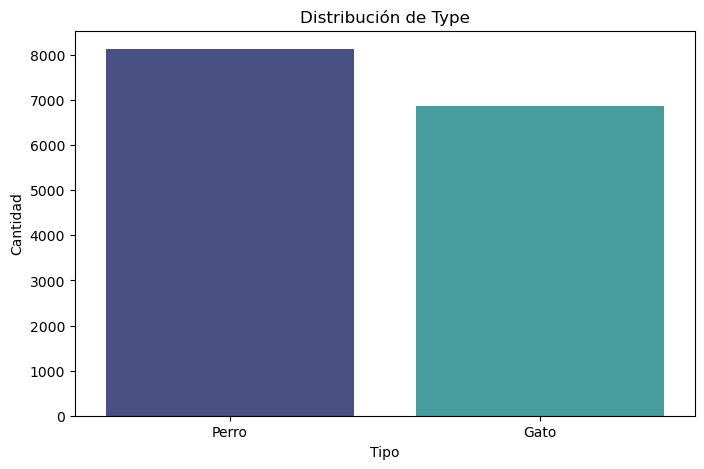

In [11]:
plt.figure(figsize=(8,5))
plt.title("Distribución de Type")
plt.ylabel("Cantidad")
plt.xlabel("Tipo")
sns.barplot(x=type_counts.index, y=type_counts.values, palette='mako');

**Se puede observar que hay 8132 perros y 6861 gatos en el dataset, con una diferencia de 1271 a favor de los perros, indicando que la variable Type está desbalanceada.**

## Name

In [12]:
df['Name'].value_counts(dropna=False)

Name
NaN                       1265
Baby                        66
Lucky                       64
No Name                     54
Brownie                     54
                          ... 
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Lab Mix Puppy 2              1
Fili                         1
Name: count, Length: 9060, dtype: int64

In [13]:
np.set_printoptions(threshold=np.inf)
df['Name'].unique()[:50]

array(['Nibble', 'No Name Yet', 'Brisco', 'Miko', 'Hunter', nan, 'BULAT',
       'Siu Pak & Her 6 Puppies', 'Kitty', 'Bear', 'Kali', 'Peanut',
       '2 Mths Old Cute Kitties', 'Lost Dog', 'Max', 'Brownie', 'Blackie',
       'Beauty', 'Godiva', 'Tigers', 'Kenit, Kenot, Techit, Keyad, Owen',
       'Donut', 'Cikenet', 'Garfield', 'No Name', 'Pepper',
       'Benji & Kimi', 'Kekok', 'BoiBoi', 'Kitten Girl Girl', 'Tom',
       'Comel', 'WHISKY', 'Boy', 'Angel',
       'Drax Aka Fatso, Quill & Rocket', 'Novy', 'Jack', 'Xiao Gou',
       'Blackie & Spotty', 'Cimpuk', 'Lollipop', 'Cute Puppies', 'Alang',
       'Blackie Duo', 'Cedric Jones', 'BouncerBoy: Beagle Mix', 'Mummies',
       'Dusty', 'Kitties'], dtype=object)

**Luego de examinar superficialmente la variable Name, es necesario realizar limpieza.**

In [14]:
# Capitalizar nombres
df['Name'] = df['Name'].str.capitalize()
df['Name'].value_counts(dropna=False)

Name
NaN                       1265
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8846, dtype: int64

In [15]:
# Reemplazar nulos por 'Unnamed'
df['Name'] = df['Name'].fillna('Unnamed')
df['Name'].value_counts(dropna=False)

Name
Unnamed                   1271
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8845, dtype: int64

In [16]:
# Reemplazar 'No Name Yet' por 'Unnamed'
df['Name'] = df['Name'].str.replace('No Name Yet', 'Unnamed')
df['Name'].value_counts(dropna=False)

Name
Unnamed                   1271
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8845, dtype: int64

In [17]:
# Evaluar casos con et
df['Name'][df['Name'].str.contains('&')].values[:50]

array(['Siu pak & her 6 puppies', 'Benji & kimi',
       'Drax aka fatso, quill & rocket', 'Blackie & spotty', 'Bill & ben',
       'Pebbles & pepper', 'Kiki & lala', 'Kt(female) & tm (male)',
       'Ibu & kitten yg diabaikan', 'Jackjack (black)& turtle (tor.shell',
       'Wong & choi', 'Rhapsody, bay, harmony, classic & symph',
       'Name them & love them 2', 'Mama & her 3 babies',
       'Giant, cookie & snoopy. ! thanks!', 'Putih & belang',
       'Mak ning & cik tam', 'Oren & comot', 'Xiao hei & xiao bai',
       'Orey & yo', 'Milk milk & mio mio', 'Torti & black',
       'Lipstick & ashton', 'Kopi-o & milo', 'Charlie & harry',
       'Nottie & choomi', 'Pearl & her kitties', 'Paris & london',
       'Mocha &latte (can be renamed)', 'Nescafe, coffee & horlicks',
       'Shatam & tam tam', 'Black & white kitten (lila)', 'Bob & marley',
       'Cat & kitten for adoption', 'Muffin & cookie (neutered)',
       'Nala & peach', 'Nonny & boink family', 'Leo & lulu',
       'Forrest & 

In [18]:
# Reemplazar , por & con espacios
df['Name'] = df['Name'].str.replace(',', ' & ')
df['Name'].value_counts(dropna=False)

Name
Unnamed                   1271
Baby                        67
Lucky                       66
Mimi                        59
Brownie                     55
                          ... 
Fallen angel                 1
Fuzzy                        1
Maroo                        1
4 puppies for adoption       1
Fili                         1
Name: count, Length: 8845, dtype: int64

In [19]:
# Eliminar caracteres especiales pero mantener '&' debido a que un registro puede indicar múltiples animales
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s&]', '', x))
df['Name'].value_counts(dropna=False)

Name
Unnamed                           1272
Baby                                67
Lucky                               66
Mimi                                60
Brownie                             56
                                  ... 
Brother & sister                     1
Batty                                1
Mixed breed puppies in serdang       1
Fury                                 1
Fili                                 1
Name: count, Length: 8747, dtype: int64

In [20]:
df['Name'][df['Name'].str.contains('named')].unique()

array(['Unnamed', 'Not yet named', 'Mocha &latte can be renamed',
       '1 year kitten named mia at damansara', ' to be named ',
       'Unamed yet 2', 'Unamed', 'Unnamed 3 kittens  by dani',
       'Not named yet', 'To be named by owner', 'Not named',
       'Kitty not named yet', 'Havent been named', 'No named',
       'Unnamed cats for adoption', 'Havent named them', 'Unamed yet',
       'Black dog  lucky named by rescurer', 'Cream cat unnamed'],
      dtype=object)

In [21]:
df['Name'][df['Name']=='nan']

Series([], Name: Name, dtype: object)

In [22]:
rep_name_pattern = '|'.join(
    [
        'Not yet named', 
        ' to be named ', 
        'Unamed yet 2', 
        'Unamed', 
        'Unnamed 3 kittens  by dani', 
        'Not named yet', 
        'To be named by owner', 
        'Not named',
        'Kitty not named yet', 
        'Havent been named', 
        'No named',
        'Unnamed cats for adoption', 
        'Havent named them', 
        'Unamed yet',
        'Cream cat unnamed'
    ])


df['Name'] = df['Name'].str.replace(rep_name_pattern, 'Unnamed', regex=True)
df['Name'].value_counts(dropna=False)

Name
Unnamed                           1291
Baby                                67
Lucky                               66
Mimi                                60
Brownie                             56
                                  ... 
Brother & sister                     1
Batty                                1
Mixed breed puppies in serdang       1
Fury                                 1
Fili                                 1
Name: count, Length: 8733, dtype: int64

In [23]:
df['Name'][df['Name'] == '']

1002     
1139     
1182     
1974     
2010     
2107     
2552     
2872     
3267     
3533     
3563     
4176     
4356     
4363     
4742     
4846     
5039     
6482     
6926     
7508     
8212     
9259     
10000    
10623    
10877    
10907    
11196    
12553    
13518    
14593    
14842    
Name: Name, dtype: object

In [24]:
df.loc[df["Name"].str.strip() == "", "Name"] = "Unnamed"
df['Name'][df['Name'] == '']

Series([], Name: Name, dtype: object)

In [25]:
df['Name'].value_counts(dropna=False)

Name
Unnamed                           1324
Baby                                67
Lucky                               66
Mimi                                60
Brownie                             56
                                  ... 
Brother & sister                     1
Batty                                1
Mixed breed puppies in serdang       1
Fury                                 1
Fili                                 1
Name: count, Length: 8730, dtype: int64

In [26]:
df['Name'][df['Name'].str.lower().isin(['name', 'no'])]

Series([], Name: Name, dtype: object)

### Crear Variable HasName

In [27]:
# Crear variable HasName
df['HasName'] = df['Name'] != 'Unnamed'

In [28]:
hasname_counts = df['HasName'].value_counts()
hasname_counts

HasName
True     13669
False     1324
Name: count, dtype: int64

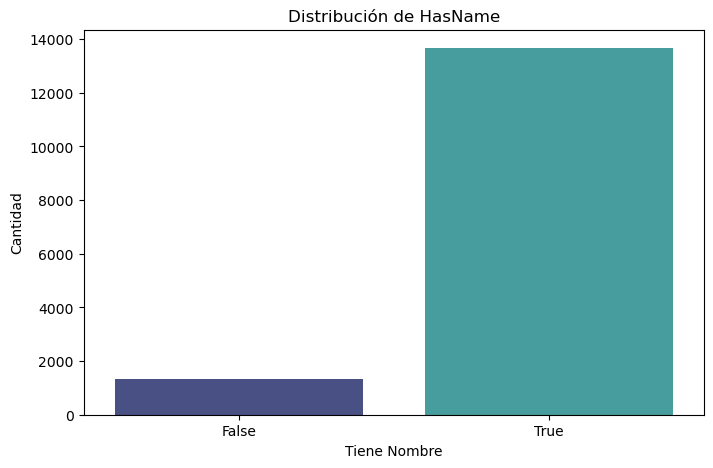

In [29]:
# Evaluar cantidad de registros con nombre
plt.figure(figsize=(8,5))
plt.title("Distribución de HasName")
plt.ylabel("Cantidad")
plt.xlabel("Tiene Nombre")
sns.barplot(x=hasname_counts.index, y=hasname_counts.values, palette='mako');

**Se puede observar que la mayoría de los animales tienen nombre.**

## Age

### Columna 'Age', armar categorías (bins), armar otra columna de 'Age_Year'

In [30]:
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  72,  73,  74,  75,  76,  77,  78,  80,  81,  82,
        84,  85,  86,  87,  88,  89,  91,  92,  95,  96, 100, 102, 108,
       112, 117, 120, 122, 123, 132, 135, 144, 147, 156, 168, 180, 212,
       238, 255], dtype=int64)

In [31]:
age_desc = df['Age'].describe()
age_desc

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

**Se puede observar el amplio rango de edad en meses de los animales, que va de 0 a 255, con un promedio de 10.45 meses y mediana de 3 meses.**

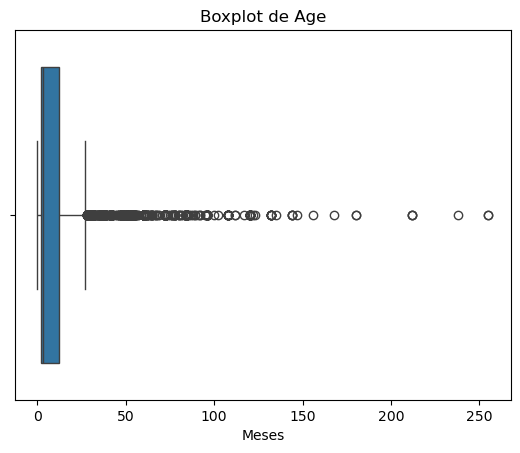

In [32]:
plt.title('Boxplot de Age')
plt.xlabel('Meses')
sns.boxplot(x=df['Age']);

In [33]:
len(df['Age'])

14993

In [34]:
age_q1 = age_desc.loc['25%']
age_q3 = age_desc.loc['75%']
age_iqr = abs(age_q3 - age_q1)
upper_bound_age = age_q3 + 1.5 * age_iqr
cant_outliers_age = len(df['Age'][df['Age'] > upper_bound_age])
print(f'Cantidad de outliers: {cant_outliers_age}')

Cantidad de outliers: 1501


In [35]:
age_counts = df['Age'].value_counts(dropna=False)[:10]
age_counts

Age
2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: count, dtype: int64

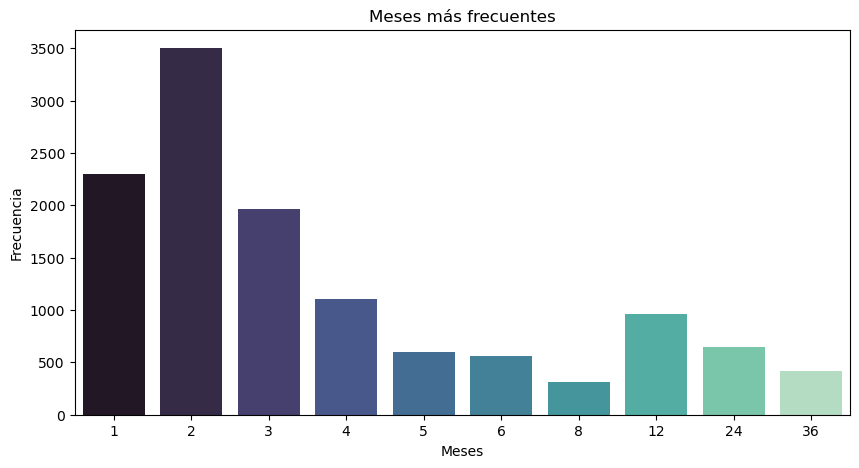

In [171]:
plt.figure(figsize=(10,5))
plt.title('Meses más frecuentes')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
sns.barplot(x=age_counts.index, y=age_counts.values, ci=None, palette='mako');

### Crear Variable AgeYear

### 💡 Nota metodológica – Variable `AgeYear`

En esta sección se crea la variable `AgeYear` como una transformación auxiliar de `Age` (edad en meses), dividiendo por 12 para facilitar la interpretación durante el análisis exploratorio.

```python
AgeYear = round(df['Age'] / 12)


In [36]:
AgeYear= round(df['Age'] / 12)

In [37]:
ageyear_counts = AgeYear.value_counts(dropna=False)
ageyear_counts.index = ageyear_counts.index.astype('int')
ageyear_counts

Age
0     10214
1      2309
2      1059
3       487
4       322
5       228
6       126
7       113
8        52
10       36
9        23
11        9
12        5
18        3
21        2
15        2
13        1
14        1
20        1
Name: count, dtype: int64

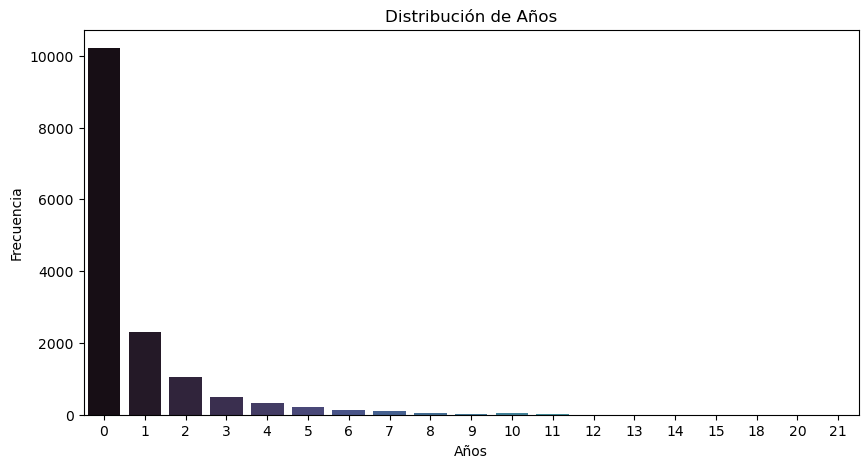

In [38]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Años')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
sns.barplot(x=ageyear_counts.index, y=ageyear_counts.values, ci=None, palette='mako');

💡 A partir de esta exploración, se concluye que la variable `AgeYear` (edad en años) mejora la interpretación de la edad.  
Por lo tanto, será **incorporada** al dataset en la etapa de Feature Engineering.


## Breed1

In [39]:
top_20_breed1 = df['Breed1'].value_counts()[:20]
top_20_breed1

Breed1
307    5927
266    3634
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
218     162
109     151
254     105
103      98
243      94
20       90
213      89
189      88
283      73
247      71
Name: count, dtype: int64

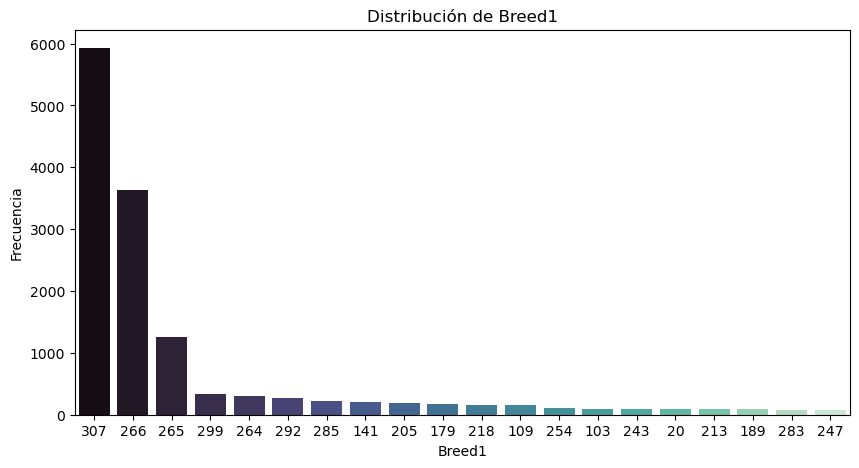

In [45]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Breed1')
plt.xlabel('Breed1')
plt.ylabel('Frecuencia')
sns.barplot(x=top_20_breed1.index, y=top_20_breed1.values, ci=None, palette='mako',order=top_20_breed1.index);


Las razas más frecuentes en el dataset son la 307 - Que es Raza Mixta, y la 266 y 265 que son los "Domestic Short Hair y Medium Hair". Basicamente, son gatos mestizos y de pelo corto.
Esto pareciera indicar que si bien originalmente se consideraba Breed 1 como raza pura, y solo si tenía Breed 2 se era mestizo, esto no es tan así. Sino que del total del dataset, la mayoría sería de raza mixta, tanto en gatos (de los casi 7000 gatos, casi 5000 son gatos domésticos de pelo corto o medio) como en perros (de los apróx 8000 perros, casi 6000 son mestizos). Esto sin considerar las mezclas donde sí se identifican las razas que generaron la mezcla.
Los 264 son los domésticos que tienen pelo largo. Sin embargo, son menos que la raza Tabby.


## Breed2

In [46]:
top_20_breed2 = df['Breed2'].value_counts()[:20]
top_20_breed2

Breed2
0      10762
307     1727
266      599
265      321
299      138
264      125
292      105
218       91
141       86
285       78
103       55
213       49
254       42
189       40
247       39
109       39
179       38
205       32
243       30
306       24
Name: count, dtype: int64

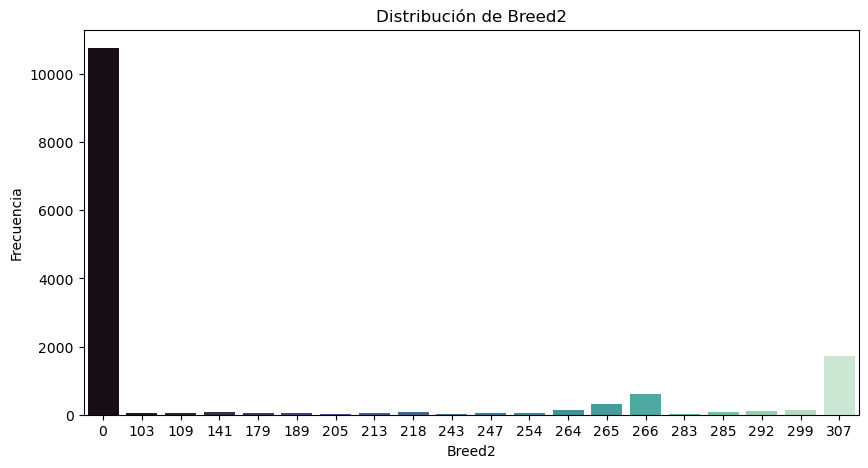

In [178]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Breed2')
plt.xlabel('Breed2')
plt.ylabel('Frecuencia')
sns.barplot(x=top_20_breed2.index, y=top_20_breed2.values, ci=None, palette='mako');

Acá es interesante analizar que las razas mixtas, donde se identifican las razas 1 y 2, tienen también un alto porcentaje de mestizaje con las mismas razas mayoritarias que identificamos en 1. Que justamente eran las mestizas. 

Esto incrementa aún más la noción que teníamos que el mestizaje en este conjunto de animales es elevado.

#### Revisamos ahora cuántos perros tienen raza mixta, considerando si tienen al menos una en 307, 265 y 266, o si tienen identificado Breed 1 y Breed 2, y cuantos no.


In [48]:
# Generar columna nueva "Mixed Race" en función de Breed 1 y Breed 2 (si AMBOS están llenos o si al menos una contiene razas 307, 265,266 o 264)
df['MixedRace'] = df['Breed1'].isin([307, 265, 266, 264]) | df['Breed2'].isin([307, 265, 266, 264]) | (df['Breed2'] != 0)
df['MixedRace'] = df['MixedRace'].astype(int) # Convertir a entero (0 o 1)


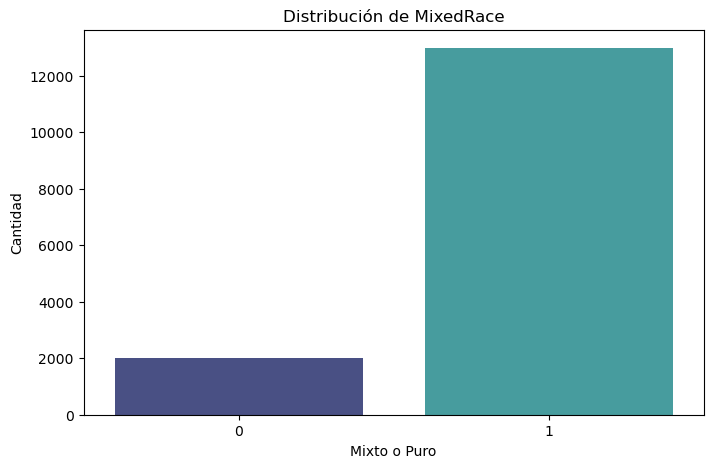

In [52]:
MixedRace_counts = df['MixedRace'].value_counts()
plt.figure(figsize=(8,5))
plt.title("Distribución de MixedRace")
plt.ylabel("Cantidad")
plt.xlabel("Mixto o Puro")
sns.barplot(x=MixedRace_counts.index, y=MixedRace_counts.values, palette='mako');

Como podemos observar, la mayoría del dataset es mixto.

## Gender

In [53]:
gender_counts = df['Gender'].value_counts(dropna=False)
gender_counts = gender_counts.rename({1:'Macho', 2:'Hembra', 3:'Mixto'})
gender_counts

Gender
Hembra    7277
Macho     5536
Mixto     2180
Name: count, dtype: int64

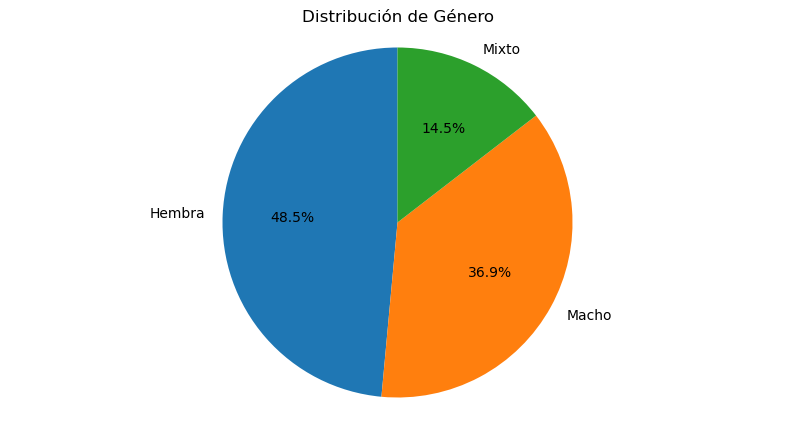

In [54]:
plt.figure(figsize=(10,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Género")
plt.axis("equal");

La categoría mixta probablemente sea en los casos donde son más de un animal en la misma publicación. Podríamos validar si esa relación se cumple 100% de las veces, o si hay algún caso de algún animal único que sea considerado "mixto".


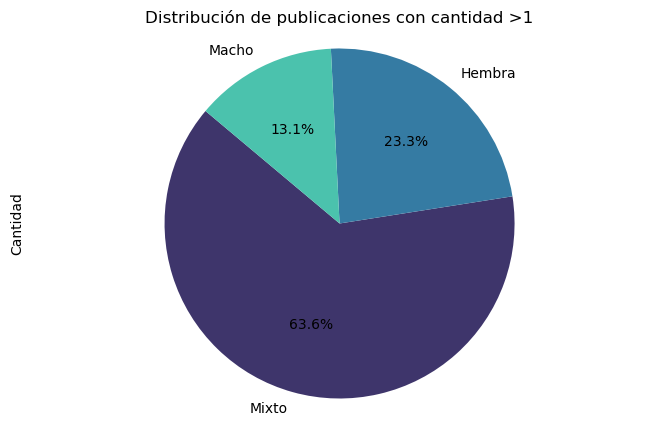

In [61]:
df['QuantityGroups'] = df['Quantity'].apply(lambda x: '>1' if x > 1 else '1')

df_filtered = df[df['QuantityGroups'] == '>1']
plt.figure(figsize=(8,5))
plt.title("Distribución de publicaciones con cantidad >1")
plt.ylabel("Cantidad")
Gender_counts_filtered = df_filtered['Gender'].value_counts()
Gender_counts_filtered = Gender_counts_filtered.rename({1:'Macho', 2:'Hembra', 3:'Mixto'})
plt.pie(Gender_counts_filtered, labels=Gender_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', n_colors=len(Gender_counts_filtered)));
plt.axis('equal')
plt.show()





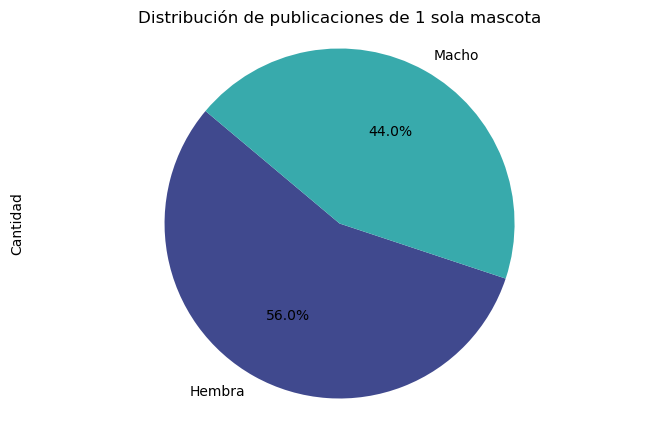

In [62]:
df_filtered = df[df['QuantityGroups'] == '1']
plt.figure(figsize=(8,5))
plt.title("Distribución de publicaciones de 1 sola mascota")
plt.ylabel("Cantidad")
Gender_counts_filtered = df_filtered['Gender'].value_counts()
Gender_counts_filtered = Gender_counts_filtered.rename({1:'Macho', 2:'Hembra', 3:'Mixto'})
plt.pie(Gender_counts_filtered, labels=Gender_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', n_colors=len(Gender_counts_filtered)));
plt.axis('equal')
plt.show()

El dataset es consistente y solo existen mixtos en publicaciones grupales.

## Color1

In [63]:
color1_counts = df['Color1'].value_counts(dropna=False)
color1_counts

Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: count, dtype: int64

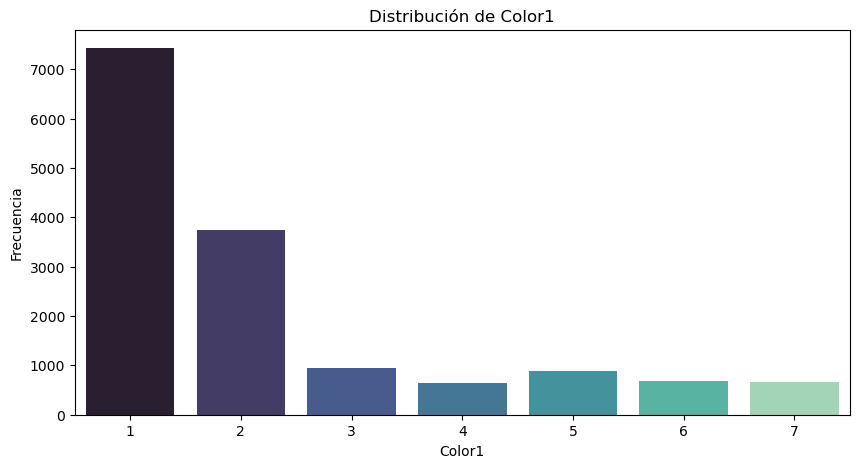

In [64]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Color1')
plt.xlabel('Color1')
plt.ylabel('Frecuencia')
sns.barplot(x=color1_counts.index, y=color1_counts.values, ci=None, palette='mako');

## Color2

In [65]:
color2_counts = df['Color2'].value_counts(dropna=False)
color2_counts

Color2
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: count, dtype: int64

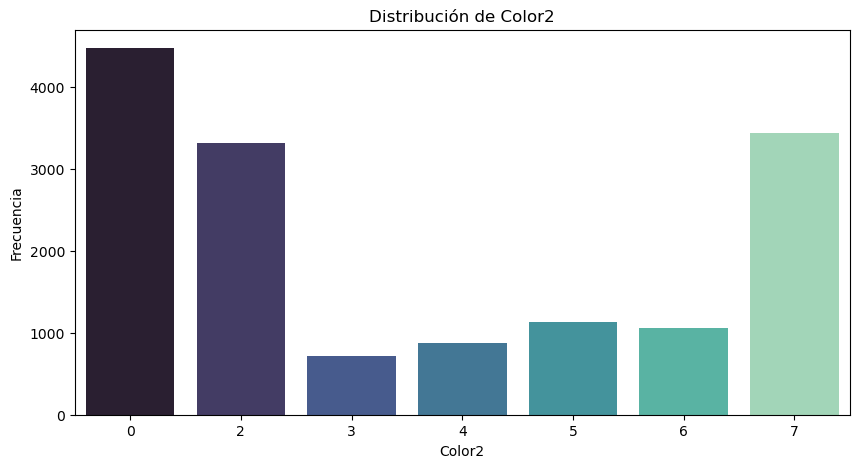

In [66]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Color2')
plt.xlabel('Color2')
plt.ylabel('Frecuencia')
sns.barplot(x=color2_counts.index, y=color2_counts.values, ci=None, palette='mako');

## Color3

In [67]:
color3_counts = df['Color3'].value_counts(dropna=False)
color3_counts

Color3
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: count, dtype: int64

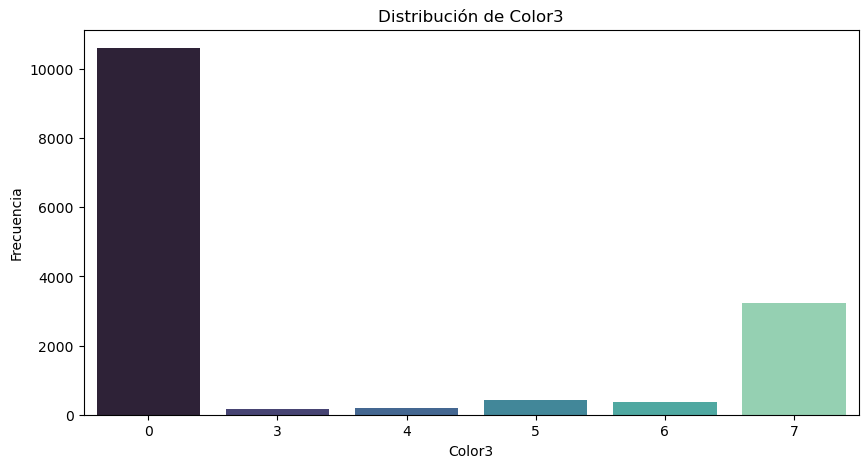

In [68]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Color3')
plt.xlabel('Color3')
plt.ylabel('Frecuencia')
sns.barplot(x=color3_counts.index, y=color3_counts.values, ci=None, palette='mako');

La mayoría de los animales listados, son mono o bi-color. Pocos llegan a tener 3 colores.

## MaturitySize

**Tamaño de perro en adultez.**
Agregar descripción

In [69]:
maturitysize_counts = df['MaturitySize'].value_counts(dropna=False)
maturitysize_counts = maturitysize_counts.rename(
    {
        1:'Pequeño', 
        2:'Mediano', 
        3:'Grande', 
        4:'Extra grande', 
        0:'No especificado'
    }
)
maturitysize_counts

MaturitySize
Mediano         10305
Pequeño          3395
Grande           1260
Extra grande       33
Name: count, dtype: int64

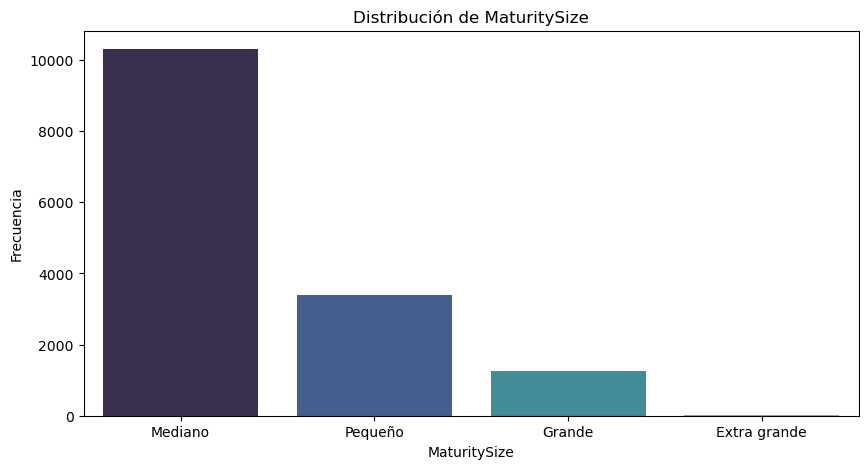

In [188]:
plt.figure(figsize=(10,5))
plt.title('Distribución de MaturitySize')
plt.xlabel('MaturitySize')
plt.ylabel('Frecuencia')
sns.barplot(x=maturitysize_counts.index, y=maturitysize_counts.values, ci=None, palette='mako');

La primera observación que puede hacerse, es que no hay NO especificados. Algo particular considerando que hay tantas razas mixtas que podría no saberse su tamaño en la madurez.
Es notable también como la mayoría determinó tamaño "mediano", seguido de "pequeño". Pareciera que no hay muchos que indiquen tamaños más grandes. Quizás podría ser por la concepción de que un perro grande es más difícil de mantener.

## FurLength

In [70]:
furlength_counts = df['FurLength'].value_counts(dropna=False)
furlength_counts = furlength_counts.rename(
    {
        1:'Corto', 
        2:'Medio', 
        3:'Largo',
        0:'No especificado'
    }
)
furlength_counts

FurLength
Corto    8808
Medio    5361
Largo     824
Name: count, dtype: int64

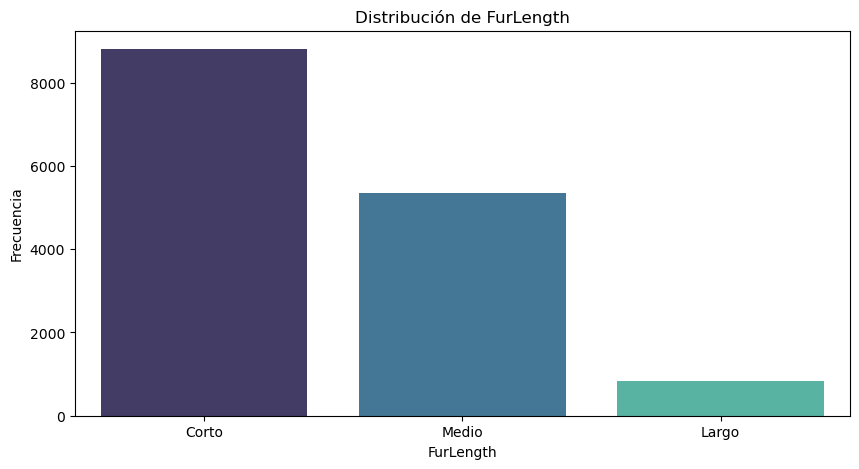

In [71]:
plt.figure(figsize=(10,5))
plt.title('Distribución de FurLength')
plt.xlabel('FurLength')
plt.ylabel('Frecuencia')
sns.barplot(x=furlength_counts.index, y=furlength_counts.values, ci=None, palette='mako');

## Vaccinated

In [72]:
vaccinated_counts = df['Vaccinated'].value_counts(dropna=False)
vaccinated_counts = vaccinated_counts.rename({
    1:'Sí',
    2:'No', 
    3:'No seguro'
})
vaccinated_counts

Vaccinated
No           7227
Sí           5898
No seguro    1868
Name: count, dtype: int64

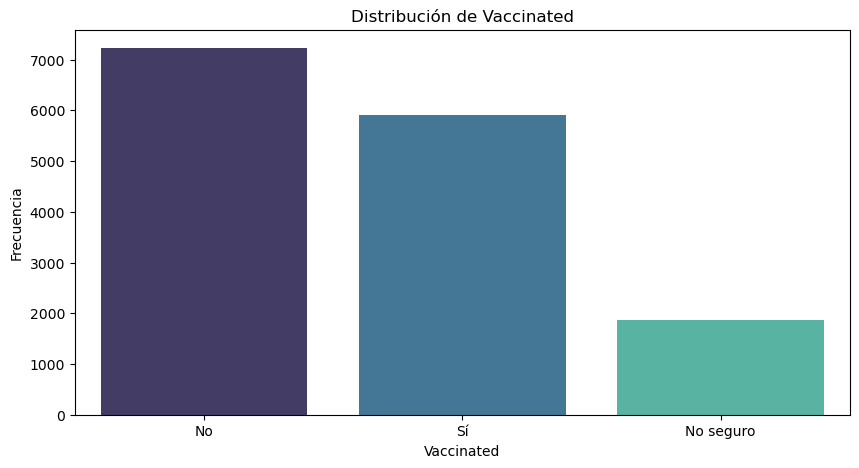

In [73]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Vaccinated')
plt.xlabel('Vaccinated')
plt.ylabel('Frecuencia')
sns.barplot(x=vaccinated_counts.index, y=vaccinated_counts.values, ci=None, palette='mako');

Es interesante como la mayoría no está vacunado. Considerando que son muchos animales rescatados, es lógico que así sea.

## Dewormed

In [74]:
dewormed_counts = df['Dewormed'].value_counts(dropna=False)
dewormed_counts = dewormed_counts.rename({
    1:'Sí',
    2:'No', 
    3:'No seguro'
})
dewormed_counts

Dewormed
Sí           8397
No           4815
No seguro    1781
Name: count, dtype: int64

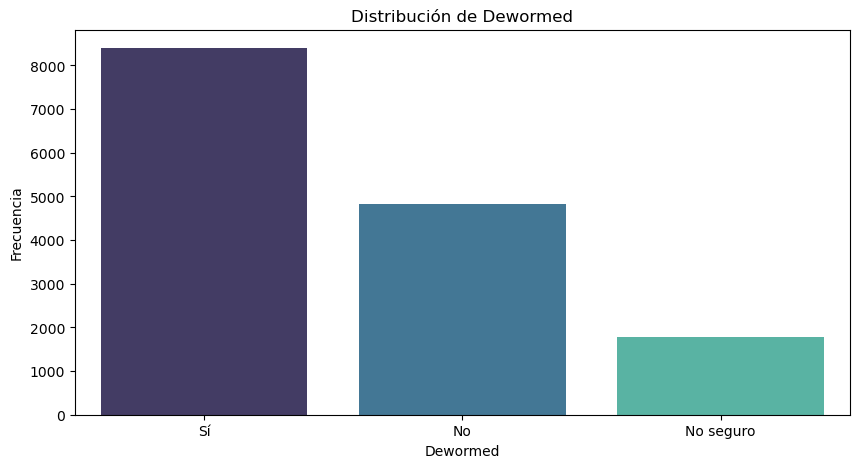

In [75]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Dewormed')
plt.xlabel('Dewormed')
plt.ylabel('Frecuencia')
sns.barplot(x=dewormed_counts.index, y=dewormed_counts.values, ci=None, palette='mako');

Acá hay un contraste con las vacunas. Porque el "Sí" es mayoría. Es cierto que desparasitar requiere pastillas, algo que es más frecuente poseer que vacunas. Pero a priori uno pensaría que están relacionadas. Más adelante evaluaremos si esto es así o no (si existe correlación)

## Sterilized

In [76]:
sterilized_counts = df['Sterilized'].value_counts(dropna=False)
sterilized_counts = sterilized_counts.rename({
    1:'Sí',
    2:'No', 
    3:'No seguro'
})
sterilized_counts

Sterilized
No           10077
Sí            3101
No seguro     1815
Name: count, dtype: int64

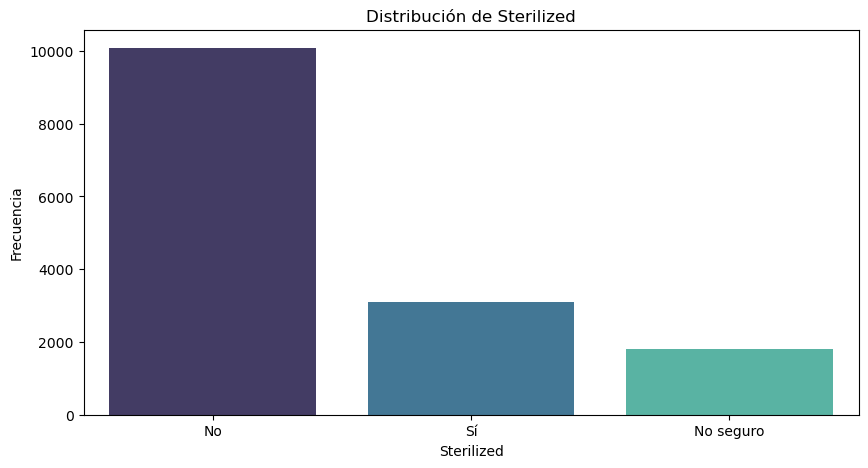

In [77]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Sterilized')
plt.xlabel('Sterilized')
plt.ylabel('Frecuencia')
sns.barplot(x=sterilized_counts.index, y=sterilized_counts.values, ci=None, palette='mako');

Esto sí tiene correlación mayor con las vacunas (a simple vista). Veremos luego si el correlograma lo comprueba o no.

## Health

In [78]:
health_counts = df['Health'].value_counts(dropna=False)
health_counts = health_counts.rename({
    1:'Saludable',
    2:'Lesión leve', 
    3:'Lesión grave',
    4:'No especificado'
})
health_counts

Health
Saludable       14478
Lesión leve       481
Lesión grave       34
Name: count, dtype: int64

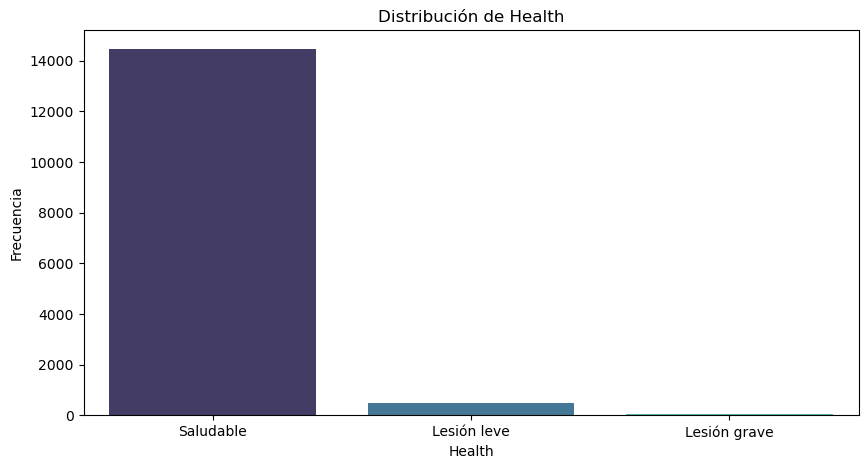

In [79]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Health')
plt.xlabel('Health')
plt.ylabel('Frecuencia')
sns.barplot(x=health_counts.index, y=health_counts.values, ci=None, palette='mako');

Es evidente que hay una clase muy mayoritaria, que es la "saludable"

## Quantity

In [80]:
quantity_counts = df['Quantity'].value_counts(dropna=False)
quantity_counts

Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: count, dtype: int64

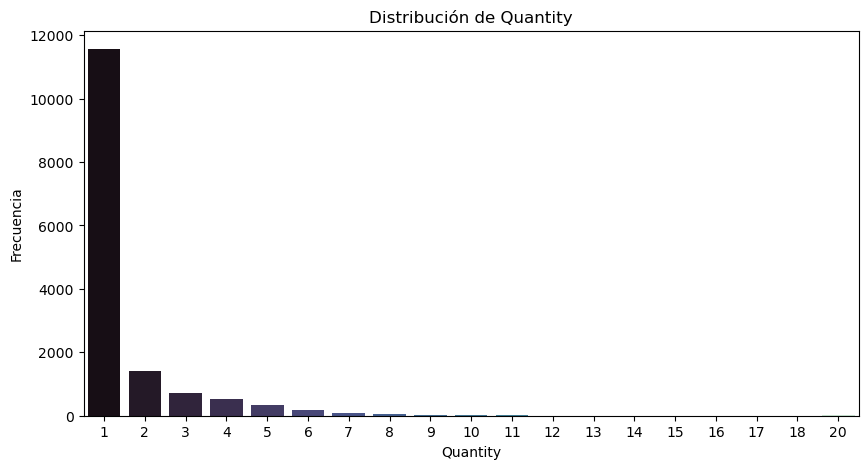

In [81]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
sns.barplot(x=quantity_counts.index, y=quantity_counts.values, ci=None, palette='mako');

La mayoría de las publicaciones son de animales únicos. Con algunos siendo en grupo.

Si queremos ver la diferencia, podemos tomar los grupos que armamos antes para evaluar la calidad del dato "Género", para hacer un pie chart que nos muestre la proporción exacta.

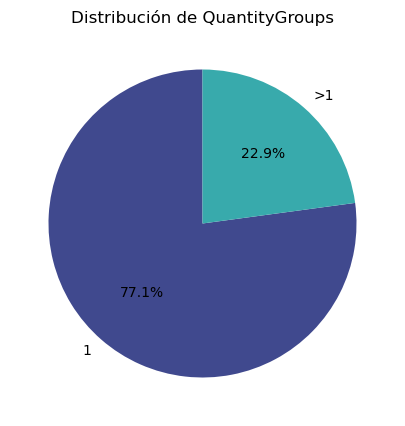

In [83]:
Grupo_Cant = df['QuantityGroups'].value_counts()
plt.figure(figsize=(10, 5))
plt.title('Distribución de QuantityGroups')
plt.pie(Grupo_Cant, labels=Grupo_Cant.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('mako', n_colors=len(Grupo_Cant)));

Como puede verse, el 77% es publicación de un solo animal.

## Fee

In [84]:
fee_counts = df['Fee'].value_counts(dropna=False)[:10]
fee_counts

Fee
0      12663
50       468
100      408
200      219
150      162
20       136
300      120
30       103
250       92
1         82
Name: count, dtype: int64

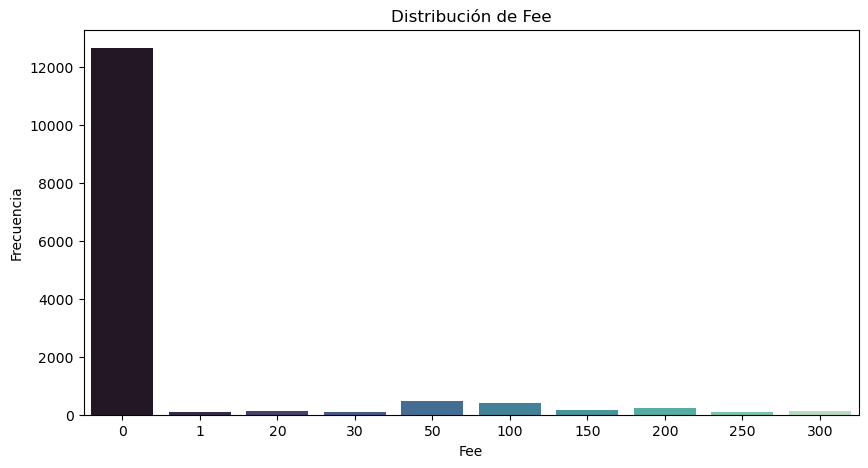

In [85]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Fee')
plt.xlabel('Fee')
plt.ylabel('Frecuencia')
sns.barplot(x=fee_counts.index, y=fee_counts.values, ci=None, palette='mako');

La mayoría son adopciones gratuitas. Sería coherente pensar que se adoptan más rápido si son gratis, o que las fees son altas solo en caso de perror puros (es más común la compra en perros de raza). Pondremos a prueba estas hipótesis luego.
El valor en sí, para estos análisis, no nos interesa tanto. Sino el concepto de si son gratis o no. Para ello, creamos la variable "Free".

### Crear Variable Free

In [86]:
df['Free'] = df['Fee'] == 0

In [87]:
free_counts = df['Free'].value_counts()
free_counts

Free
True     12663
False     2330
Name: count, dtype: int64

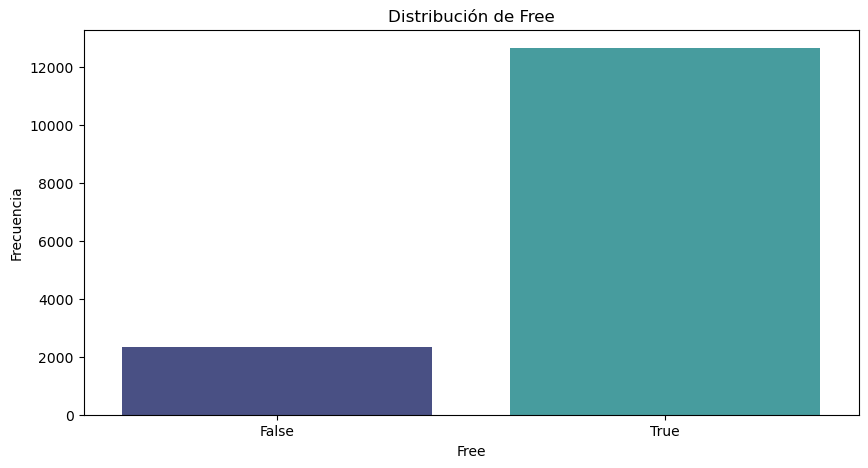

In [205]:
plt.figure(figsize=(10,5))
plt.title('Distribución de Free')
plt.xlabel('Free')
plt.ylabel('Frecuencia')
sns.barplot(x=free_counts.index, y=free_counts.values, ci=None, palette='mako');

Entonces, ahora observamos como se cruzan las razas con si son gratis o no.

<Axes: title={'center': 'Razas vs Free'}, xlabel='Free', ylabel='Frecuencia'>

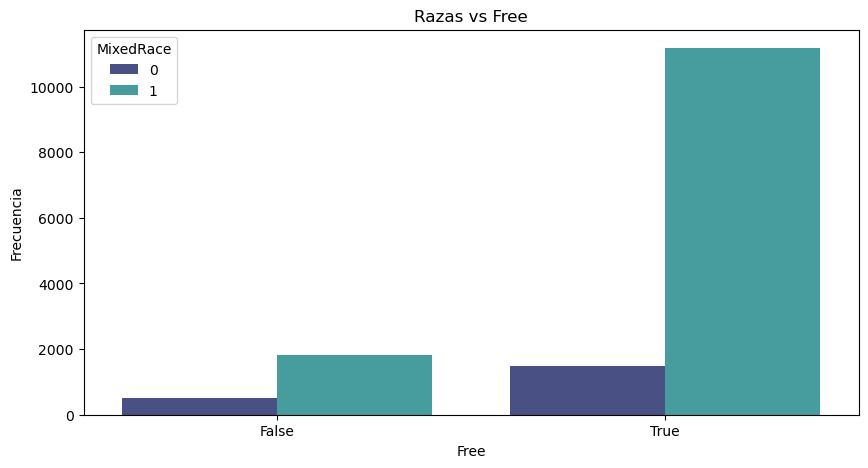

In [ ]:
# Barplot con apertura según variable Free, y color según MixedRace
plt.figure(figsize=(10,5))
plt.title('Razas vs Free')
plt.xlabel('Free')
plt.ylabel('Frecuencia')

aggregated_data = df.groupby(['Free', 'MixedRace']).size().reset_index(name='Count')

sns.barplot(
	data=aggregated_data,
	x='Free',
	y='Count',
	hue='MixedRace',
	palette='mako',
	dodge=True
)



Pareciera no comprobarse la hipótesis. Ya que la proporción de raza pura o mixta en los gratuitos y los pagos, se mantiene similar.

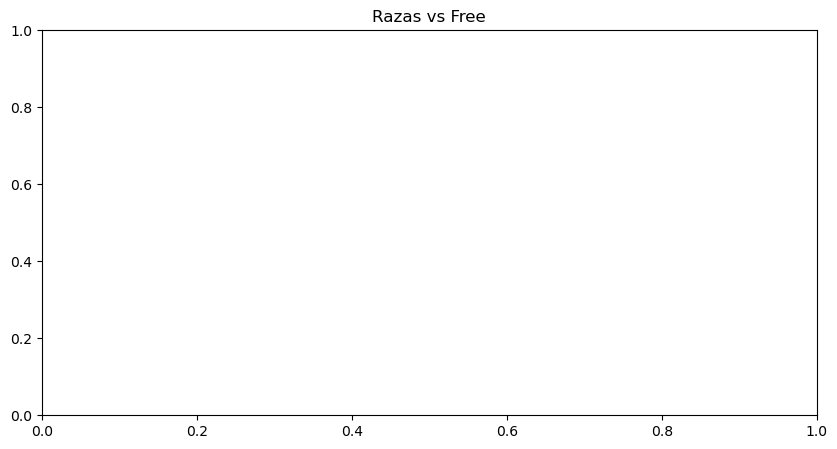

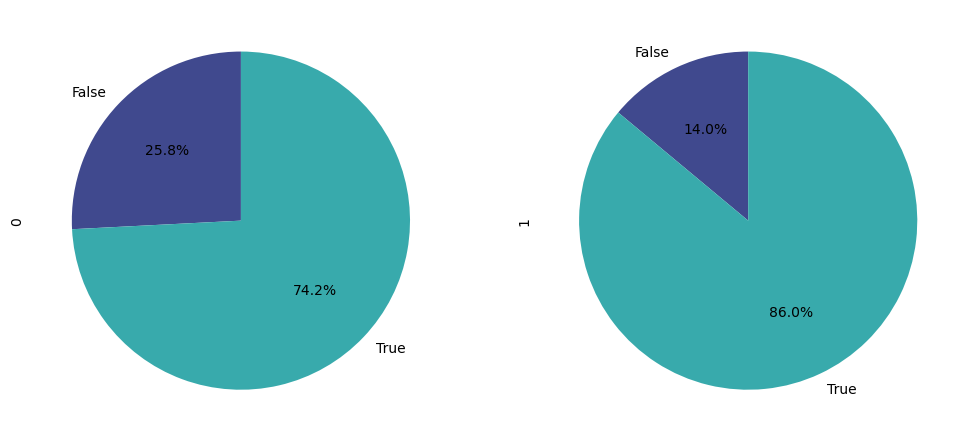

In [90]:
# Pie chart con apertura según variable Free, y color según MixedRace
plt.figure(figsize=(10, 5))
plt.title('Razas vs Free')

aggregated_data_pie = aggregated_data.groupby(['Free', 'MixedRace'])['Count'].sum().unstack()

aggregated_data_pie.plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    startangle=90,
    figsize=(12, 6),
    legend=False,
    colors=sns.color_palette('mako', n_colors=2)
)

plt.show()



Viendolo en piecharts, podemos apreciar que existe una leve variación. Pero no es tan significativa como la imaginábamos.

<Axes: title={'center': 'Rangos de Fee vs MixedRace'}, xlabel='FeeRange', ylabel='Frecuencia'>

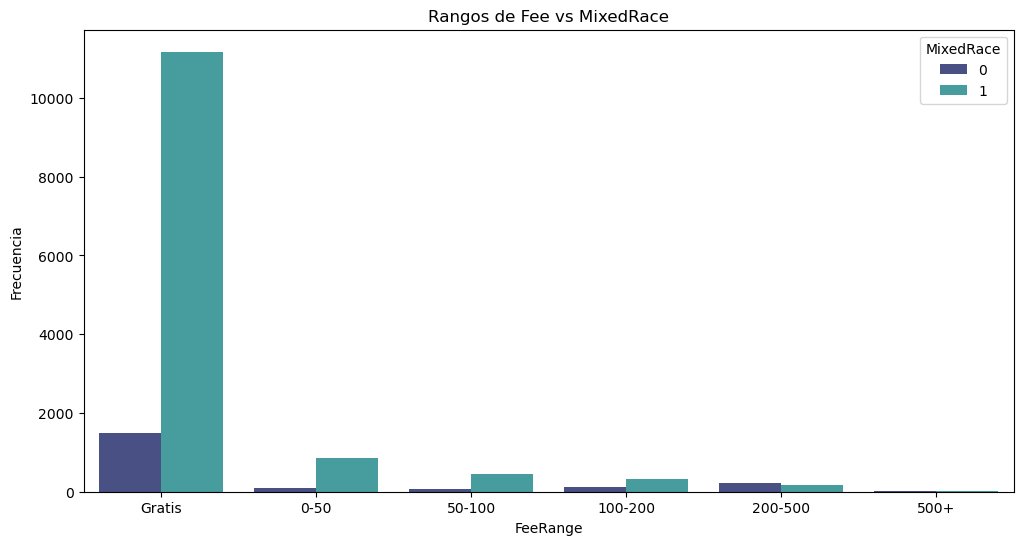

In [91]:
# Crear rangos de Fee
df['FeeRange'] = pd.cut(df['Fee'], bins=[-1, 0, 50, 100, 200, 500, df['Fee'].max()], labels=['Gratis', '0-50', '50-100', '100-200', '200-500', '500+'])

# Barplot con apertura según variable FeeRange, y color según MixedRace
plt.figure(figsize=(12, 6))
plt.title('Rangos de Fee vs MixedRace')
plt.xlabel('FeeRange')
plt.ylabel('Frecuencia')

aggregated_data_fee = df.groupby(['FeeRange', 'MixedRace']).size().reset_index(name='Count')

sns.barplot(
    data=aggregated_data_fee,
    x='FeeRange',
    y='Count',
    hue='MixedRace',
    palette='mako',
    dodge=True
)


Pareciera que al aumentar el valor del animal, comienza a aumentar la proporción de puros. Por ende, nuestra hipótesis, si bien no era acertada totalmente, tiene algo de lógica y se condice un poco con los datos.

## State

In [92]:
state_counts = df['State'].value_counts(dropna=False)
state_counts

State
41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: count, dtype: int64

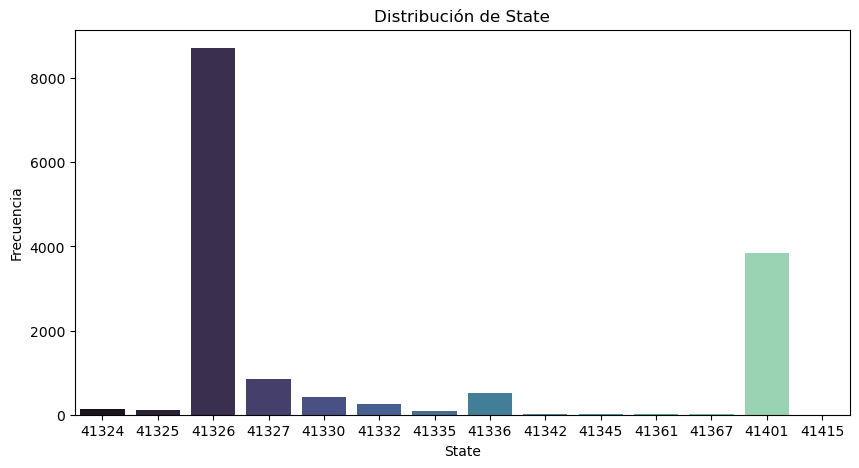

In [93]:
plt.figure(figsize=(10,5))
plt.title('Distribución de State')
plt.xlabel('State')
plt.ylabel('Frecuencia')
sns.barplot(x=state_counts.index, y=state_counts.values, ci=None, palette='mako');

Más adelante, se tratarán los datos en mapas, para visualizar mejor esta información.

## RescuerID

In [94]:
cant_rescatistas = df['RescuerID'].nunique()
cant_rescatistas

5595

In [95]:
rescuer_counts = df['RescuerID'].value_counts()
rescuer_counts

RescuerID
fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
                                   ... 
89bc6d71d57ad5d7e952ed76559345c5      1
8cfafc812c500eee7c112911ef668ce9      1
8512e22c06a01cdc76481ff0a6e88b67      1
48de9ff092328d54b2b371bc72b07b03      1
79309f4027f2fedb4349a298c69fe56f      1
Name: count, Length: 5595, dtype: int64

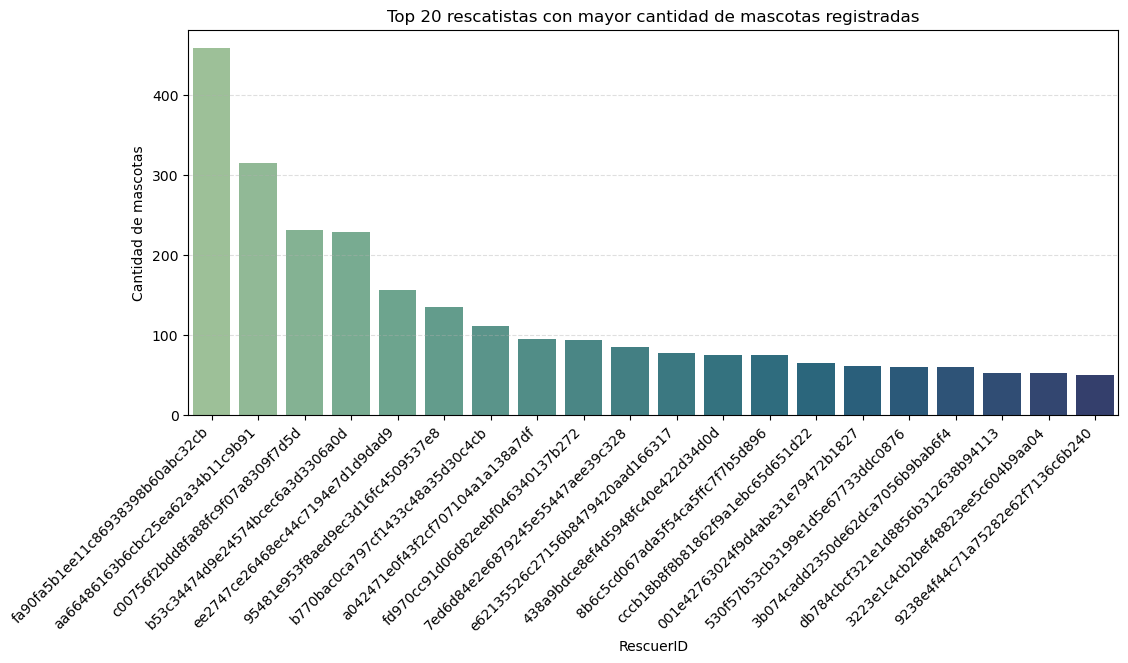

In [96]:
top_20 = rescuer_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
sns.barplot(x=top_20.index, y=top_20.values, palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 rescatistas con mayor cantidad de mascotas registradas')
plt.ylabel('Cantidad de mascotas')
plt.xlabel('RescuerID')
plt.grid(axis='y', linestyle='--', alpha=0.4)




### Distribución de actividad de rescatistas

El gráfico muestra a los 20 rescatistas que más mascotas registraron en el dataset.

💡 Se observa una clara concentración de actividad: un grupo muy reducido supera las 100 o incluso 400 mascotas, mientras que la mayoría registra cantidades significativamente menores.

🔍 Este patrón podría reflejar diferencias en la experiencia, reputación o capacidad de gestión de cada rescatista, y podría ser relevante para el modelado posterior. Se considera crear una feature representativa de esta actividad (`RescuerActivity`) en la etapa de Feature Engineering.


## VideoAmt

In [97]:
videoamt_counts = df['VideoAmt'].value_counts(dropna=False)
videoamt_counts

VideoAmt
0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: count, dtype: int64

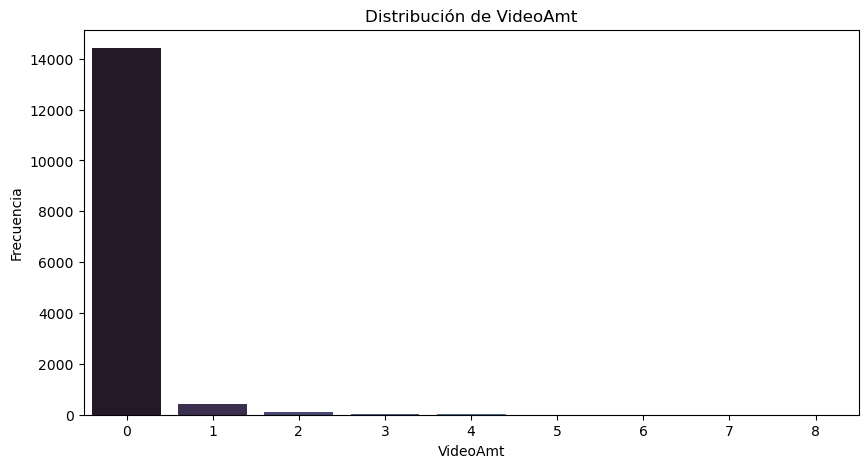

In [98]:
plt.figure(figsize=(10,5))
plt.title('Distribución de VideoAmt')
plt.xlabel('VideoAmt')
plt.ylabel('Frecuencia')
sns.barplot(x=videoamt_counts.index, y=videoamt_counts.values, ci=None, palette='mako');

Evidentemente, la mayoría NO cuenta con videos de los animales. Será interesante ver si los que tienen video suelen adoptarse más que los que no.

## Description

In [99]:
df['Description'].value_counts(dropna=False)[:5]

Description
For Adoption                               164
Dog 4 Adoption                              54
Cat for adoption                            25
Friendly                                    20
Please feel free to contact us : Stuart     18
Name: count, dtype: int64

In [101]:
df['HasDescription'] = df['Description'].notna()

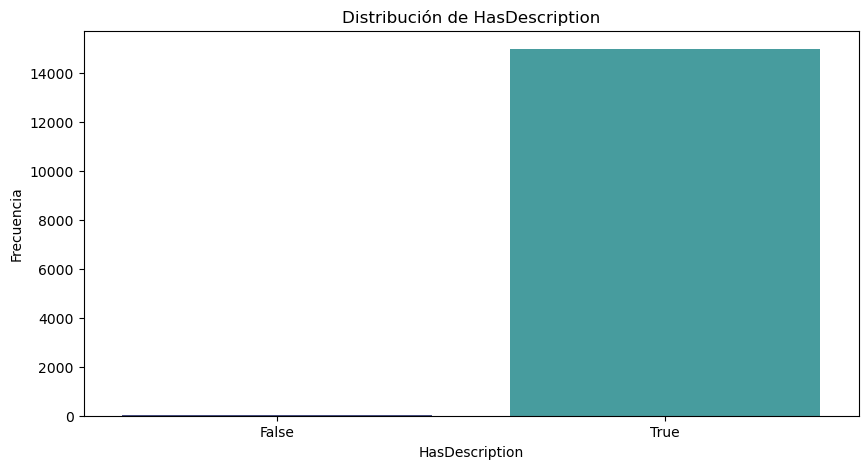

In [102]:
hasdescription_counts = df['HasDescription'].value_counts()
hasdescription_counts
plt.figure(figsize=(10,5))
plt.title('Distribución de HasDescription')
plt.xlabel('HasDescription')
plt.ylabel('Frecuencia')
sns.barplot(x=hasdescription_counts.index, y=hasdescription_counts.values, palette='mako');


Casi no hay casos sin descripción.
Sería interesante ver si podemos sacarle el jugo a la descripción, y ver si podemos obtener palabras "clave" para los casos de adopción más rápida y evitar aquellas frases o expresiones utilizadas en aquellas que más lento se dieron. (Veremos si podemos hacer ese análisis)

## PetID

In [100]:
df['PetID'].duplicated(keep=False).any()

False

**No hay ids de animales duplicados.**

## PhotoAmt

In [103]:
photoamt_counts = df['PhotoAmt'].value_counts(dropna=False)
photoamt_counts.index = photoamt_counts.index.astype('int')
photoamt_counts

PhotoAmt
1     3075
2     2518
3     2511
5     2147
4     1881
6      621
7      432
0      341
8      314
9      231
10     190
11     184
12      97
13      86
14      78
15      50
16      39
17      27
20      25
19      20
30      19
18      18
21      16
24      15
23      12
26      10
22       9
25       8
28       7
27       6
29       6
Name: count, dtype: int64

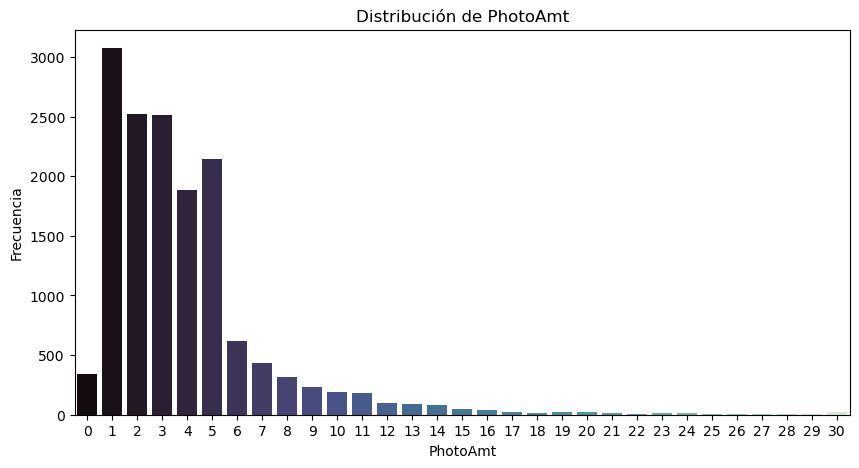

In [104]:
plt.figure(figsize=(10,5))
plt.title('Distribución de PhotoAmt')
plt.xlabel('PhotoAmt')
plt.ylabel('Frecuencia')
sns.barplot(x=photoamt_counts.index, y=photoamt_counts.values, ci=None, palette='mako');

Casi no existen publicaciones sin imágenes.

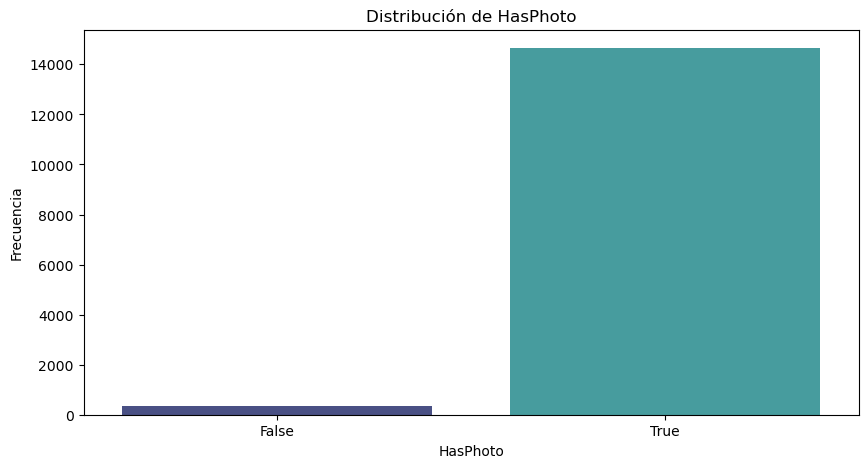

In [ ]:
df['HasPhoto'] = df['PhotoAmt'] > 0
df['HasPhoto'].value_counts(dropna=False)
hasphoto_counts = df['HasPhoto'].value_counts()
plt.figure(figsize=(10,5))
plt.title('Distribución de HasPhoto')
plt.xlabel('HasPhoto')
plt.ylabel('Frecuencia')
sns.barplot(x=hasphoto_counts.index, y=hasphoto_counts.values, palette='mako');


## AdoptionSpeed

In [106]:
adoptionspeed_counts = df['AdoptionSpeed'].value_counts(dropna=False)
adoptionspeed_counts

AdoptionSpeed
4    4197
2    4037
3    3259
1    3090
0     410
Name: count, dtype: int64

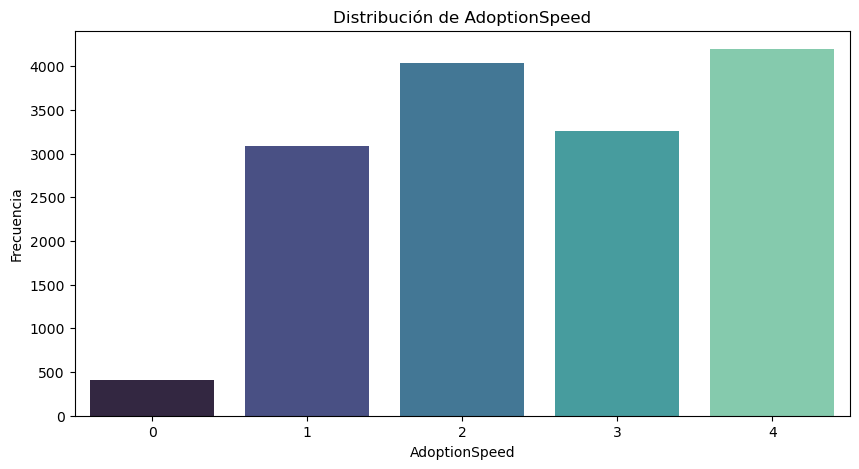

In [107]:
plt.figure(figsize=(10,5))
plt.title('Distribución de AdoptionSpeed')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Frecuencia')
sns.barplot(x=adoptionspeed_counts.index, y=adoptionspeed_counts.values, ci=None, palette='mako');

Lo primero a observar, es que las clases a predecir están desbalanceadas. En particular el 0, está muy lejos del resto. Esto es lógico (es esperable que no se suelan adoptar el MISMO día que se publica). Pero no deja de representar un desafío para el modelo.

In [108]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'HasName', 'MixedRace', 'QuantityGroups', 'Free', 'FeeRange',
       'HasDescription', 'HasPhoto'],
      dtype='object')

# 📊 Análisis Multivariado

En esta sección exploraremos cómo se relacionan múltiples variables del dataset entre sí, y particularmente con la variable objetivo `AdoptionSpeed`.

El análisis multivariado permite:
- Detectar asociaciones entre variables que pueden influir en la velocidad de adopción.
- Identificar patrones que no serían visibles en un análisis univariado.
- Evaluar posibles redundancias entre variables (correlación entre predictoras).
- Servir de base para una futura selección de variables y modelado predictivo.

El enfoque estará dividido en tres grandes partes:

1. **Estructura interna** del dataset (correlación entre variables predictoras).
2. **Relación entre variables predictoras y la variable objetivo `AdoptionSpeed`**, tanto numéricas como categóricas.
3. **Importancia relativa de variables** mediante un modelo exploratorio.

Este análisis busca no solo visualizar relaciones, sino **interpretarlas con profundidad**, para sentar una base sólida para cualquier modelo que se construya más adelante.


## 🔹 1. Estructura Interna del Dataset: Correlación entre Variables Predictoras

Antes de analizar cómo las variables influyen en la adopción, es fundamental entender **cómo se relacionan entre sí** las variables predictoras.

Este análisis nos permite:
- Detectar **multicolinealidad** (cuando dos o más variables están altamente correlacionadas).
- Identificar posibles **redundancias** que podrían afectar modelos futuros.
- Entender si algunas variables aportan información similar.

Para ello, construimos un **heatmap de correlaciones** entre todas las variables numéricas.


Text(0.5, 1.0, 'Correlación entre variables numéricas (sin simetría)')

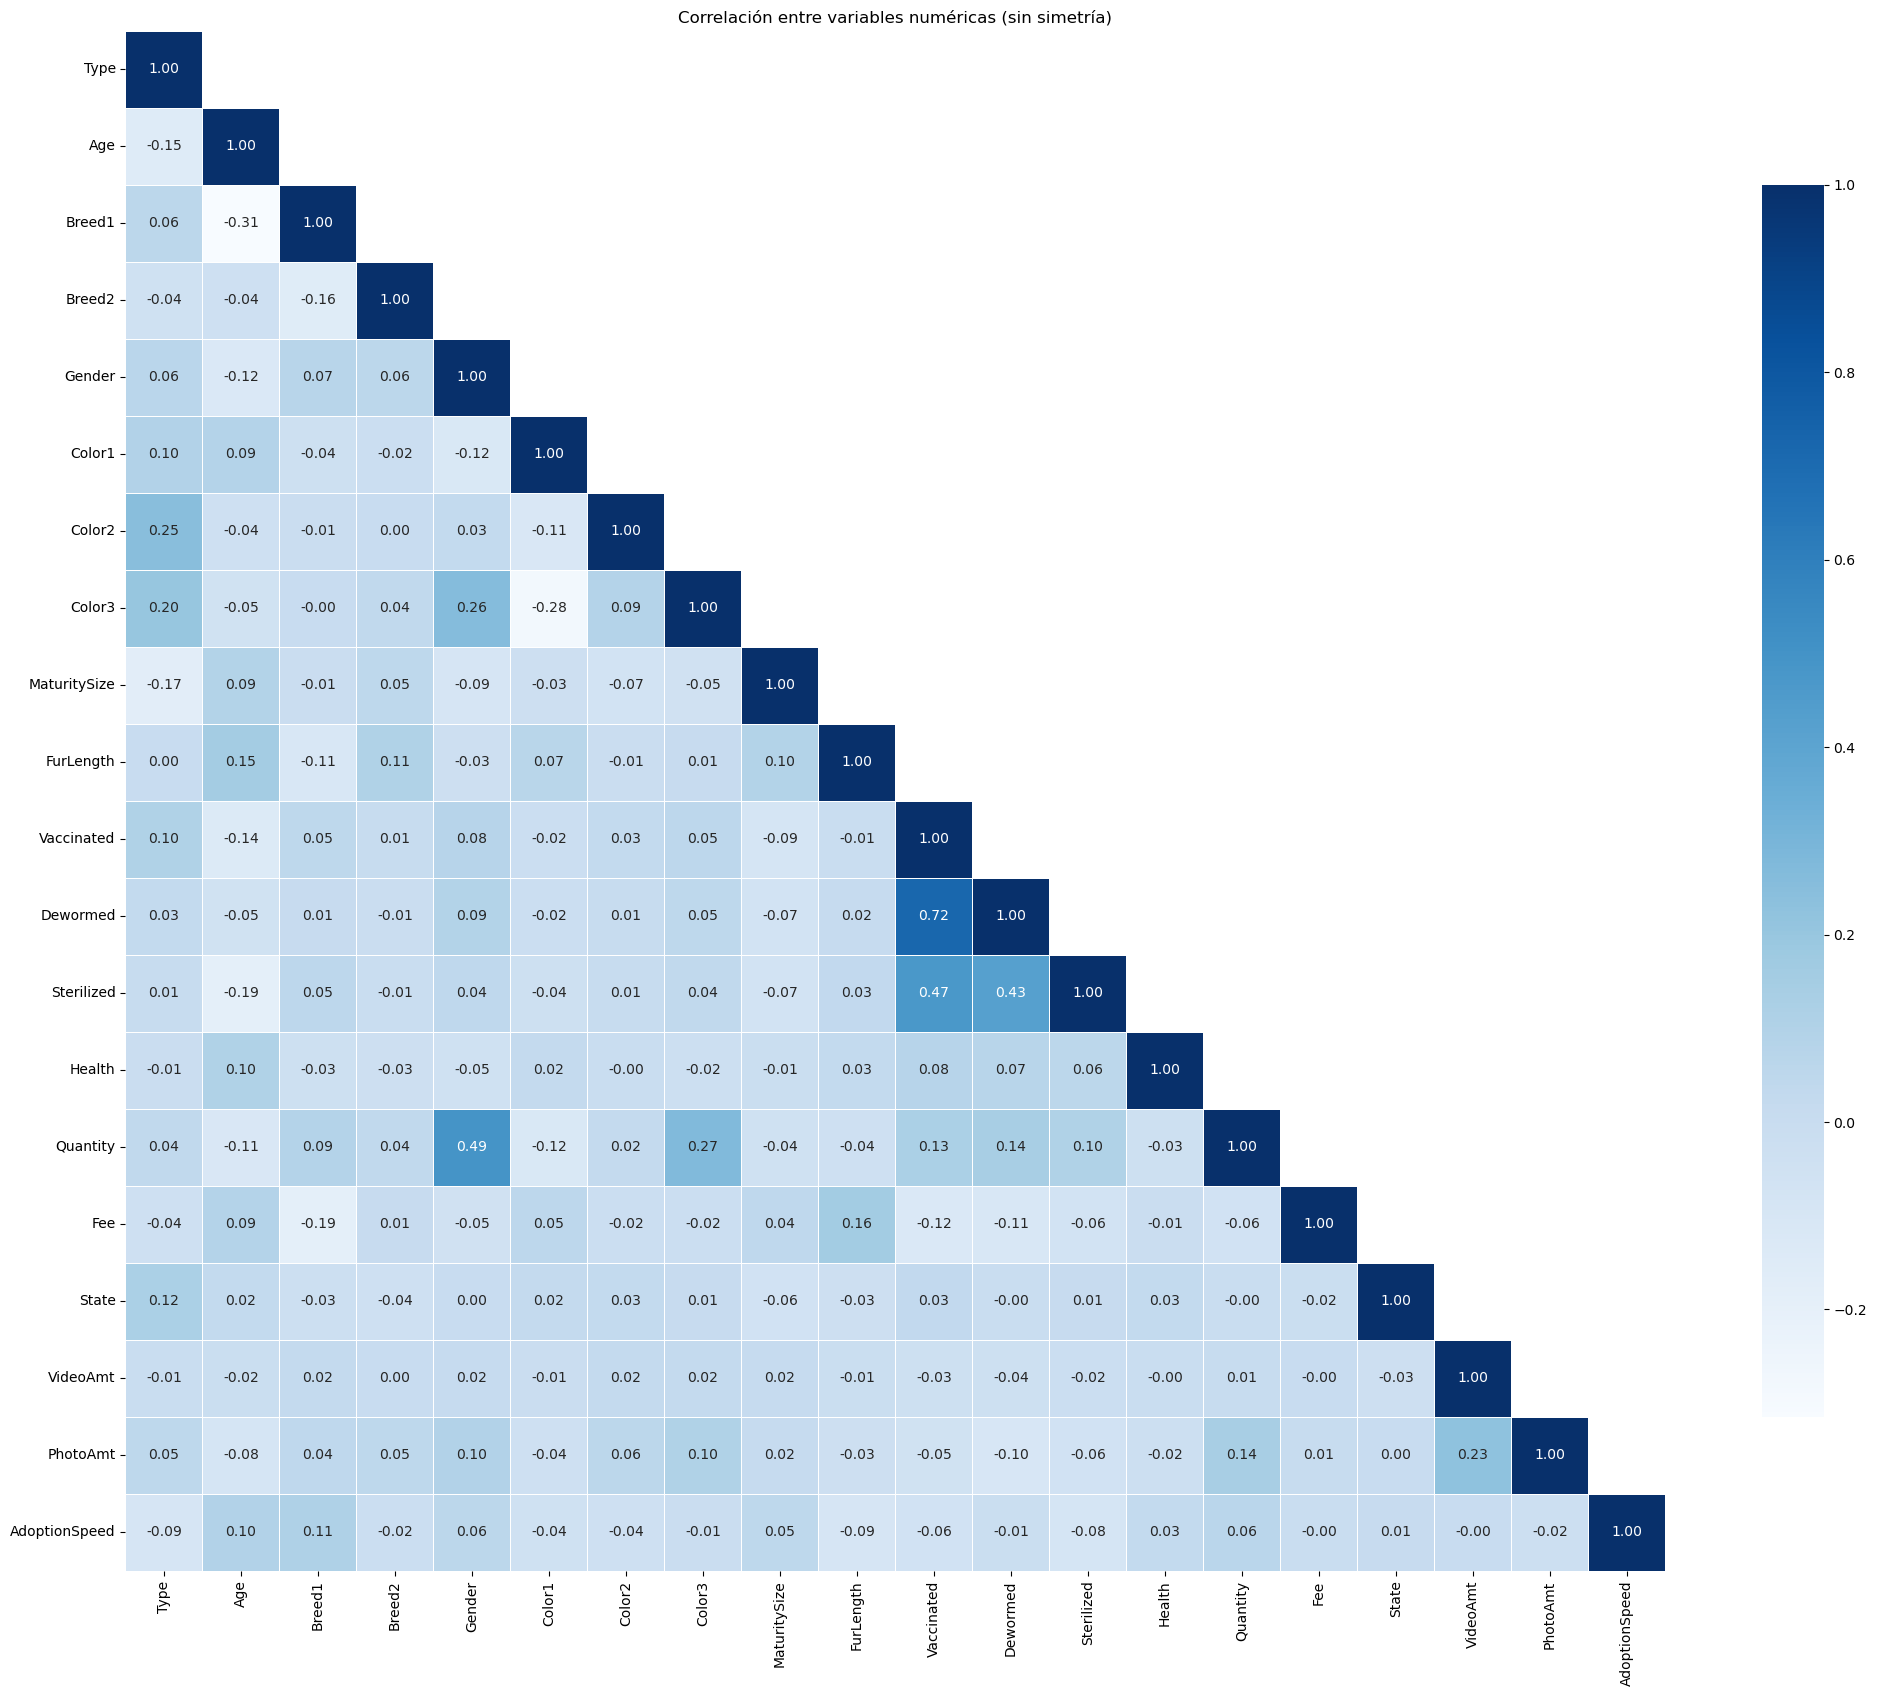

In [109]:
plt.figure(figsize=(25, 20))

df_corr = df.select_dtypes(['int64', 'float64']).corr()

# Máscara solo del triángulo superior EXCLUYENDO la diagonal
mask = np.triu(np.ones_like(df_corr, dtype=bool), k=1)

sns.heatmap(df_corr, mask=mask, annot=True, cmap='Blues', fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlación entre variables numéricas (sin simetría)')


### 🔎 Lectura del Heatmap

El heatmap de correlación permite identificar relaciones lineales entre variables numéricas del dataset. En esta etapa, se destacan algunos pares con correlaciones moderadas o altas que pueden ser relevantes para el análisis posterior:

- `Vaccinated` ~ `Dewormed`: r ≈ **0.72**  
- `Vaccinated` ~ `Sterilized`: r ≈ **0.47**  
- `Quantity` ~ `Gender`: r ≈ **0.49**

Estas asociaciones reflejan patrones consistentes con la lógica del dominio:

- Las variables relacionadas con intervenciones veterinarias (`Vaccinated`, `Dewormed`, `Sterilized`) suelen coexistir, lo cual puede reflejar prácticas sanitarias homogéneas entre rescatistas. A diferencia de lo que habíamos definido de forma visual, pareciera ser mayor la relación entre vacunado y desparasitado de lo que inicialmente vimos.
- La correlación entre `Quantity` y `Gender` podría estar asociada a diferencias en la cantidad de animales ofrecidos según su sexo, como camadas del mismo género o sesgos en la publicación. Lo más probable es que esta correlación se de por la existencia de publicaciones de más de un animal, y de la existencia del género "mixed", como vimos anteriormente.

> 🔁 Las autocorrelaciones (`r = 1.00`) se mantienen en la diagonal por motivos visuales, aunque carecen de interpretación analítica.

> 💡 Una posibilidad podría ser **agrupar o consolidar** las variables sanitarias en un solo indicador (por ejemplo, una variable que represente "atención médica completa"), reduciendo así la redundancia en el modelado predictivo.




---

### 🧠 Reflexión metodológica

El análisis de correlación es una herramienta útil para identificar relaciones entre variables numéricas. En esta etapa se utilizó el coeficiente de **Pearson**, que mide asociaciones lineales. Sin embargo, **esto no permite descartar completamente la presencia de multicolinealidad ni capturar relaciones no lineales o monotónicas**.

Existen escenarios en los que:

- Varias variables, aunque débilmente correlacionadas de forma individual, pueden en conjunto explicar otra de manera redundante.
- Relaciones no lineales o monotónicas no se reflejan correctamente con Pearson, por lo que puede considerarse el uso de **Spearman** en análisis complementarios.

🔍 Por estos motivos, se prevé complementar este análisis con herramientas más robustas en etapas posteriores del pipeline, como:

- **Variance Inflation Factor (VIF)** para detectar redundancia multivariada real.
- **Análisis de importancia de variables** en modelos predictivos supervisados.
- **Reducción de dimensionalidad (PCA)** en caso de alta redundancia estructural.

Estas técnicas se aplicarán luego del preprocesamiento y la ingeniería de variables, para garantizar una selección de features sólida, minimizando redundancias y maximizando la interpretabilidad del modelo.


## 🔹 2. Relación entre Variables Predictoras y la Variable Objetivo (`AdoptionSpeed`)

En esta sección se analiza cómo se relacionan las variables predictoras con la variable objetivo `AdoptionSpeed`, que representa la rapidez con la que una mascota es adoptada.

El objetivo de este análisis es:

- Detectar patrones multivariados relevantes.
- Identificar variables predictoras fuertes o débiles.
- Visualizar asociaciones complejas que no se perciben en análisis univariados.
- Evaluar la importancia relativa de las variables en el proceso de adopción.

Dado que `AdoptionSpeed` es una variable **ordinal discreta** (de 0 a 4), se abordan distintos tipos de análisis según el tipo de variable predictora.

Esta sección está estructurada en varios bloques:

---

### 🔸 2.1 Variables numéricas vs. `AdoptionSpeed`

Se exploran variables numéricas con gráficos tipo **boxplot**, **stripplot** y análisis de correlación de **Spearman**, útil para detectar relaciones no lineales pero monotónicas. Estas visualizaciones permiten observar cómo varían las distribuciones de características como `Age`, `PhotoAmt`, `Fee`, etc., según la rapidez de adopción.

---

### 🔸 2.2 Variables categóricas vs. `AdoptionSpeed`

Se analizan mediante **gráficos de barras** la distribución de adopciones para cada categoría, considerando variables como `Gender`, `Breed`, `Sterilized`, entre otras. Esto permite detectar categorías que tienden a tener mayor o menor velocidad de adopción.

---

### 🗺️ Distribución geográfica (`State` vs. `AdoptionSpeed`)

Se incorporan mapas interactivos construidos con **Folium**, que permiten visualizar por estado la cantidad de mascotas adoptadas en cada categoría de `AdoptionSpeed`. Esta visualización enriquece el análisis incluyendo una dimensión espacial del fenómeno de adopción.

---

### 🌲 Modelo exploratorio de importancia de variables

Se entrena un modelo simple de **Random Forest Classifier** para estimar la importancia relativa de las variables predictoras respecto a `AdoptionSpeed`. Esto complementa el análisis multivariado desde una perspectiva algorítmica y permite validar empíricamente las asociaciones detectadas previamente.

---



### 🔸 2.1 Variables Numéricas vs. `AdoptionSpeed`

En este bloque se analiza cómo se comportan las variables numéricas en relación con la variable objetivo `AdoptionSpeed`, que representa la rapidez con la que una mascota es adoptada (de 0 = adopción inmediata a 4 = sin adopción).

Dado que `AdoptionSpeed` es una variable **ordinal discreta**, se utilizaron herramientas visuales y estadísticas para explorar diferencias en la distribución de variables como `Age`, `PhotoAmt`, `Fee`, entre otras.

Los métodos aplicados fueron:

- 📊 **Boxplots**: permiten comparar la mediana, la dispersión y la presencia de outliers para cada categoría de adopción.
- 📈 **Correlación de Spearman**: permite detectar relaciones **monotónicas no lineales** entre variables numéricas y `AdoptionSpeed`.

> Estas visualizaciones ayudan a identificar patrones útiles para el modelado posterior y a justificar la transformación o selección de variables predictoras relevantes.  
> No se incluyeron `stripplots` ni `violinplots`, dado que las herramientas seleccionadas fueron suficientes para reflejar con claridad la información relevante.




Para este análisis, dejaremos solamente las variables numéricas NO CATEGÓRICAS. O aquellas que sí son categóricas pero tienen cierta ordinalidad. Ya que la idea es ver diferencias numéricas. Y las categóricas no ordinales, al estar armadas de forma arbitraria, podrían dar distintos resultados dependiendo de la definición arbitraria del que armó la base.
Por eso, nos quedaremos en este análisis solo con:
- Age
- Maturity size (ordinal)
- Health (levemente ordinal)
- Quantity
- Fee
- Video Amt
- Photo Amt

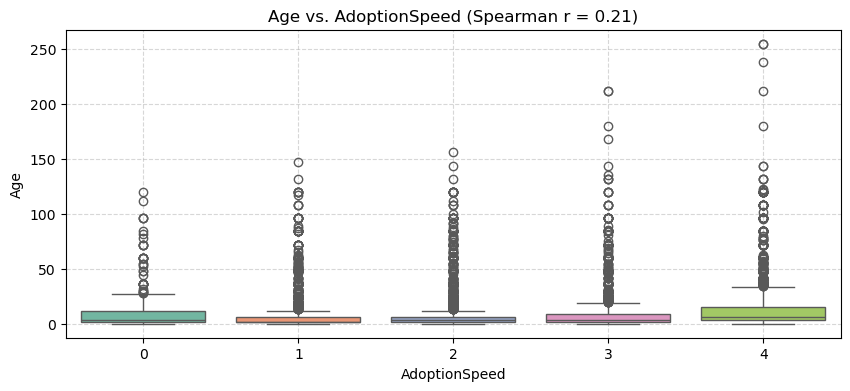

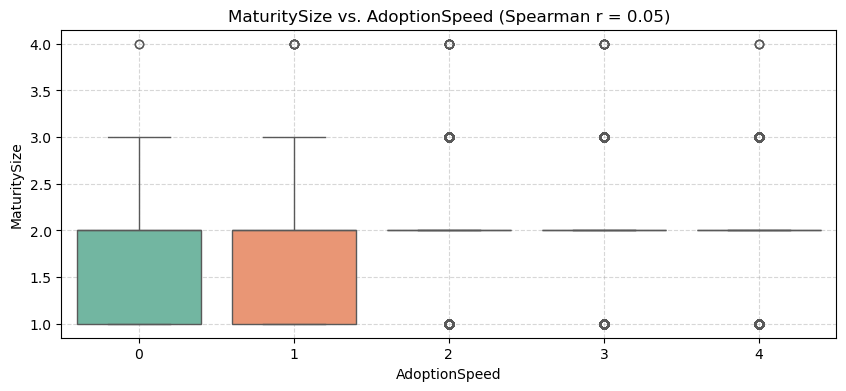

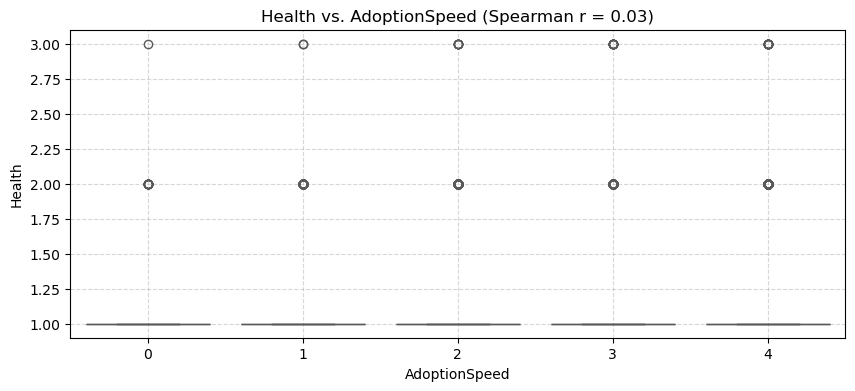

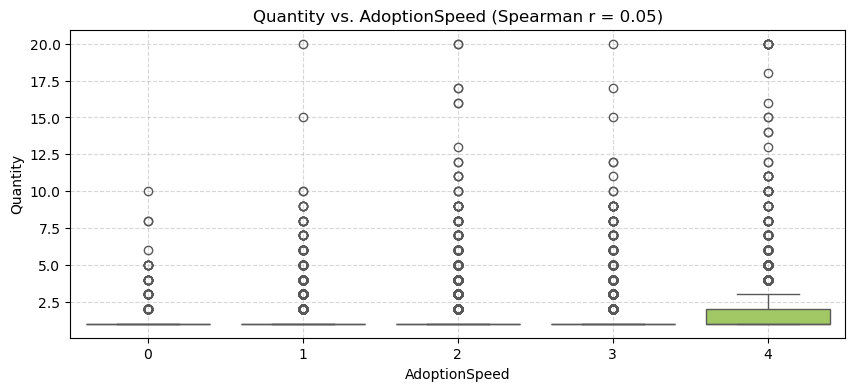

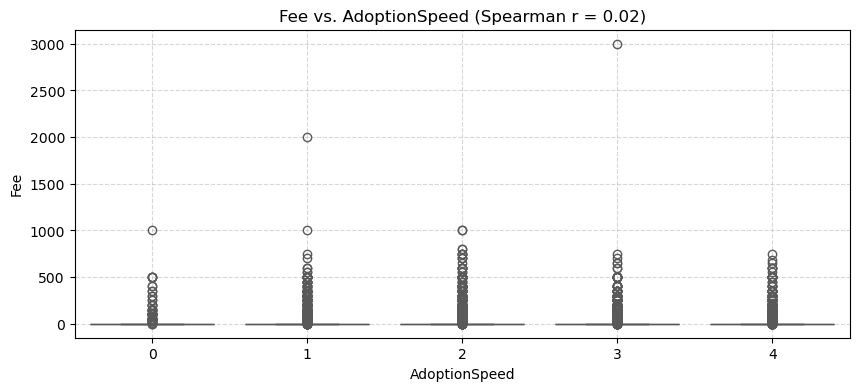

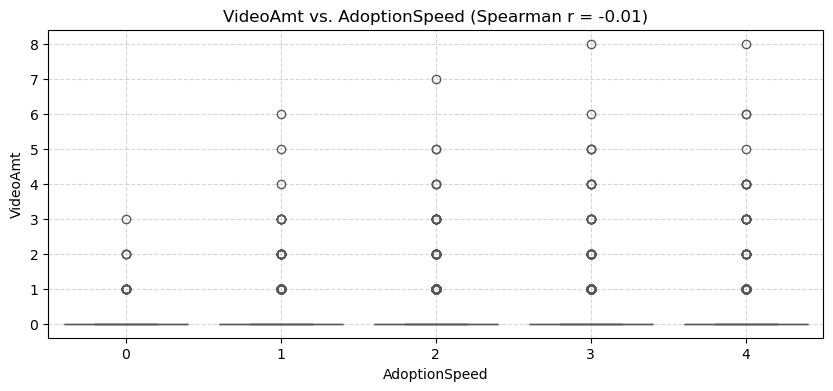

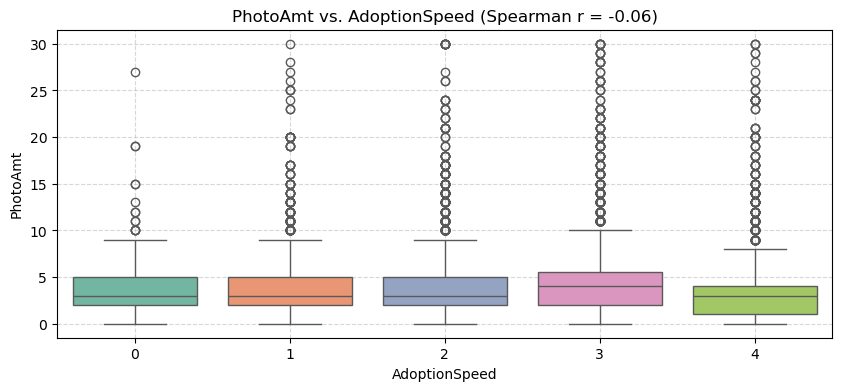

In [115]:
# Filtrar solo las variables especificadas
variables_interes = ['Age', 'MaturitySize', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

# Gráficos combinados con Spearman en el título
for var in variables_interes:
    rho, _ = spearmanr(df[var], df['AdoptionSpeed'], nan_policy='omit')
    
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='AdoptionSpeed', y=var, data=df, palette='Set2')
    plt.title(f'{var} vs. AdoptionSpeed (Spearman r = {rho:.2f})')
    plt.xlabel('AdoptionSpeed')
    plt.ylabel(var)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

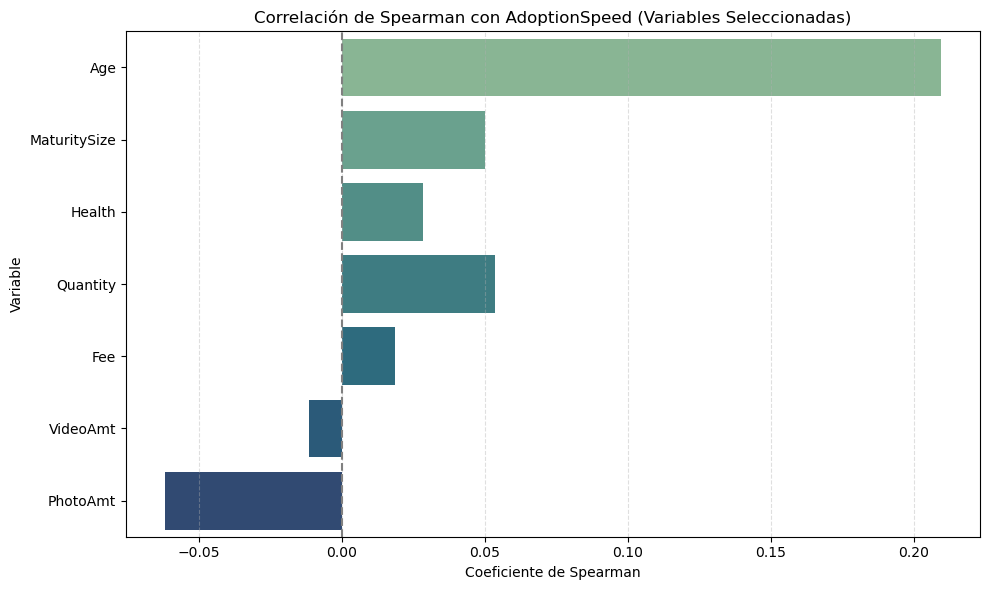

In [119]:
# Filtrar las variables de interés
variables_interes = ['Age', 'MaturitySize', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
cor_spearman_filtered = cor_spearman_df.loc[variables_interes]

# Graficar las correlaciones de Spearman para las variables seleccionadas
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_spearman_filtered.Spearman_r, y=cor_spearman_filtered.index, palette='crest')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Correlación de Spearman con AdoptionSpeed (Variables Seleccionadas)')
plt.xlabel('Coeficiente de Spearman')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Lo primero a analizar es que la edad es lo que más pareciera impactar en el adoption speed. Lo que nos dice Spearman en este caso, es que a mayor edad del animal, más parece tardar su adopción. Esto tiene sentido. Uno en general busca adoptar cachorros, y tenerlos durante mucho tiempo con uno.
La relación del tamaño parece coincidir levemente con la premisa inicial nuestra de que la gente suele preferir no adoptar perros tan grandes, por su dificultad de mantenimiento.
La cantidad es coherente que se relaciones (es probable que si uno tiene 10 perros a dar en adopción, tarde más en que adopten a todos que uno que da en adopción a un perro solo).
Salúd y precio tienen  casi 0 correlación, pero positiva (a más lastimado o más caro, más se tarda en encontrarle hogar).
Lo interesante acá es que pareciera que hay correlación negativa en las fotos y los videos con la adopción. Entonces una conclusión que podríamos sacar es que a mayor contenido audiovisual de los animales a dar en adopción, más rápido se adoptan. Entonces si uno busca dar en adopción animales, es recomendable tomar muchas fotos, y muchos videos.

De todas formas, la correlación resultante en todos los casos es bastante cercana a 0, lo que nos muestra un dataset que no tiene correlación extremadamente fuerte entre estas variables y Adoption Speed.

### 🗺️ Distribución Geográfica por Velocidad de Adopción (`AdoptionSpeed`)

A continuación se visualiza la distribución de mascotas por estado en Malasia según la velocidad con la que fueron adoptadas (`AdoptionSpeed`). Cada mapa corresponde a una categoría ordinal de adopción, desde la más rápida (0) hasta la ausencia de adopción (4).

Los mapas están construidos con **Folium**, lo que permite explorar de forma interactiva cada estado pasando el mouse por encima para conocer la cantidad de mascotas correspondientes.

| Valor | Categoría               | Interpretación temporal                         |
|-------|--------------------------|--------------------------------------------------|
| **0** | 🟢 Adopción inmediata     | El mismo día de publicación                     |
| **1** | 🟡 Adopción rápida        | Entre 1 y 7 días                                 |
| **2** | 🟠 Adopción moderada      | Entre 8 y 30 días                                |
| **3** | 🔴 Adopción lenta         | Entre 31 y 90 días                               |
| **4** | ⚫ Sin adopción           | Más de 100 días                                 |

> 💡 *Esta visualización permite detectar regiones con mayor o menor tasa de adopción en cada categoría, facilitando el análisis multivariado geográfico del comportamiento de adopción.*


#### 📌 Reflexión metodológica

El uso de mapas geográficos permite identificar si la variable `State` tiene una asociación espacial relevante con la rapidez de adopción. Si bien esta variable por sí sola no explica completamente el fenómeno, **puede ser un importante complemento dentro de un enfoque multivariado**, ya que refleja condiciones regionales, acceso a centros de adopción, o nivel de urbanización.


In [121]:
#Leer state_labels.csv
state_labels = pd.read_csv('state_labels.csv')
state_labels.head(3)

StateID StateName
0    41336     Johor
1    41325     Kedah
2    41367  Kelantan

In [122]:
df = df.merge(state_labels, left_on="State", right_on="StateID", how="left")
df["StateName_clean"] = df["StateName"].replace({
    "Melaka": "Malacca",
    "Pulau Pinang": "Penang"
}).fillna(df["StateName"])



for feature in geojson_data["features"]:
    original = feature["properties"]["shapeName"]
    feature["properties"]["StateName_clean"] = {
        "Melaka": "Malacca",
        "Pulau Pinang": "Penang"
    }.get(original, original)

# === 3. Definiciones de título por categoría ===
titulos = {
    0: "🟢 Adopción inmediata – Mismo día de publicación",
    1: "🟡 Adopción rápida – Entre 1 y 7 días",
    2: "🟠 Adopción moderada – Entre 8 y 30 días",
    3: "🔴 Adopción lenta – Entre 31 y 90 días",
    4: "⚫ Sin adopción – Más de 100 días"
}

# === 4. Calcular el máximo global ===
global_counts = df.groupby(["AdoptionSpeed", "StateName_clean"]).size().reset_index(name="count")
max_global_value = global_counts["count"].max()

# === 5. Crear mapas ===
for speed in sorted(df["AdoptionSpeed"].unique()):
    adopciones = df[df["AdoptionSpeed"] == speed].groupby("StateName_clean").size().reset_index(name="count")

    df_merge = pd.DataFrame({
        "StateName_clean": [f["properties"]["StateName_clean"] for f in geojson_data["features"]]
    }).merge(adopciones, on="StateName_clean", how="left").fillna(0)

    for feature in geojson_data["features"]:
        estado = feature["properties"]["StateName_clean"]
        cantidad = df_merge.loc[df_merge["StateName_clean"] == estado, "count"].values[0]
        feature["properties"]["Mascotas"] = int(cantidad)

    m = folium.Map(location=[4.5, 109.5], zoom_start=6, tiles="CartoDB positron")

    choropleth = folium.Choropleth(
        geo_data=geojson_data,
        name="choropleth",
        data=df_merge,
        columns=["StateName_clean", "count"],
        key_on="feature.properties.StateName_clean",
        fill_color="YlGnBu",
        fill_opacity=0.75,
        line_opacity=0.5,
        nan_fill_color="white",
        legend_name=f"Mascotas – AdoptionSpeed {speed}",
        threshold_scale=[
            0,
            max_global_value * 0.25,
            max_global_value * 0.5,
            max_global_value * 0.75,
            max_global_value
        ],
        reset=True
    ).add_to(m)

    tooltip = GeoJsonTooltip(
        fields=["StateName_clean", "Mascotas"],
        aliases=["Estado:", "Mascotas:"],
        labels=True,
        localize=True,
        sticky=False
    )
    choropleth.geojson.add_child(tooltip)

    # Título específico por categoría
    display(HTML(f"<h3 style='font-family:sans-serif;'>{titulos[speed]}</h3>"))
    display(m)


NameError: name 'geojson_data' is not defined

### 🔸 2.2 Variables Categóricas vs. `AdoptionSpeed`

En este bloque se analiza cómo se relacionan las variables categóricas con la variable objetivo `AdoptionSpeed`.

Dado que `AdoptionSpeed` representa niveles ordinales de velocidad de adopción, este análisis permite detectar si ciertas categorías favorecen una adopción más rápida o más lenta.

Se utilizaron principalmente:

- **Countplots segmentados** (`hue='AdoptionSpeed'`): para visualizar la distribución de adopciones dentro de cada categoría de variables como `Gender`, `Sterilized`, `Vaccinated`, `Breed`, entre otras.

Además, para facilitar la visualización:

- Se agruparon las razas principales y secundarias menos frecuentes como `'Other'`, mostrando solo el top 10 de cada una.

> 💡 Este análisis es clave para identificar variables categóricas con alto poder discriminativo, lo cual es especialmente útil si se planea aplicar codificación posterior (como one-hot encoding o target encoding) en modelos predictivos.


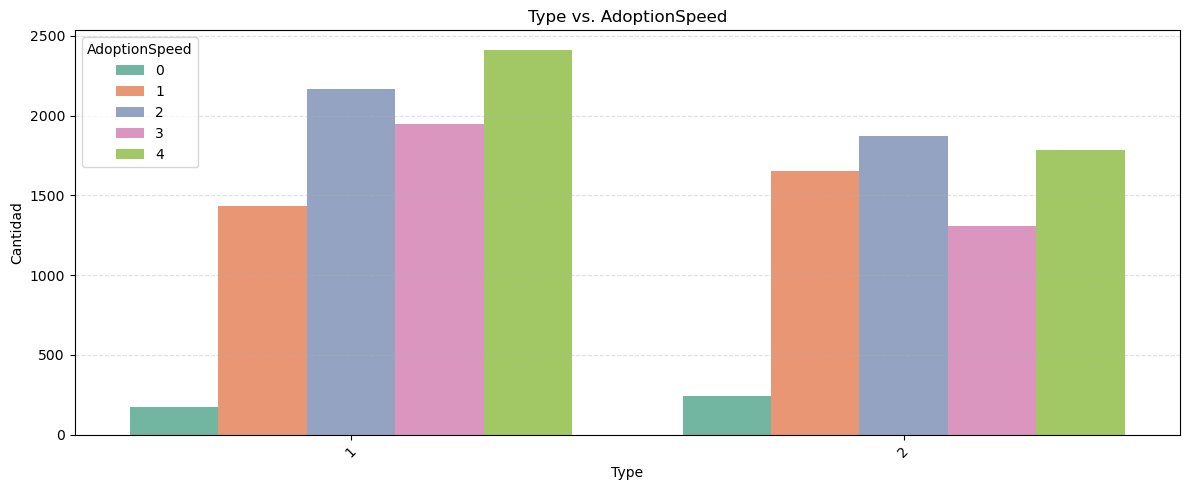

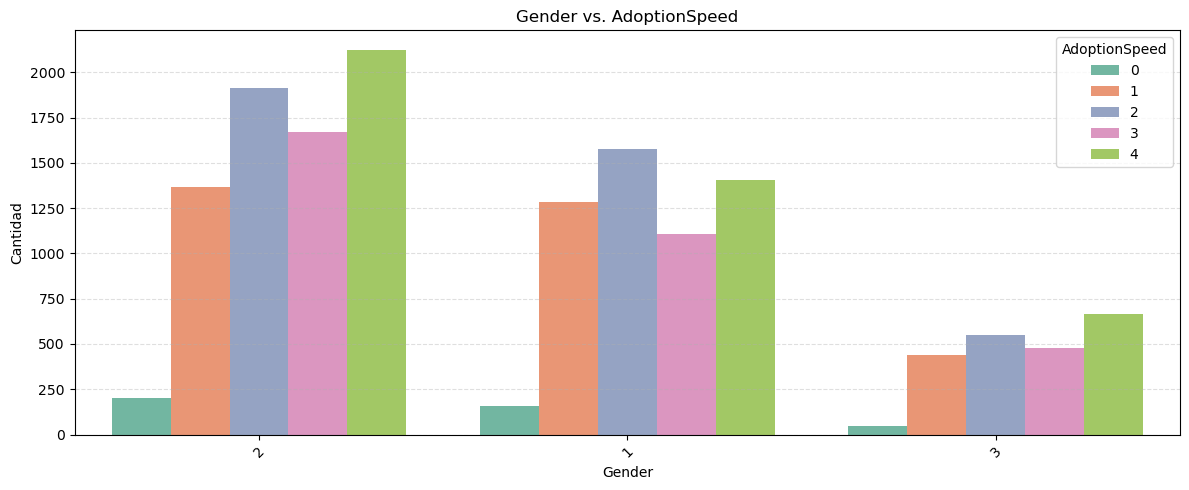

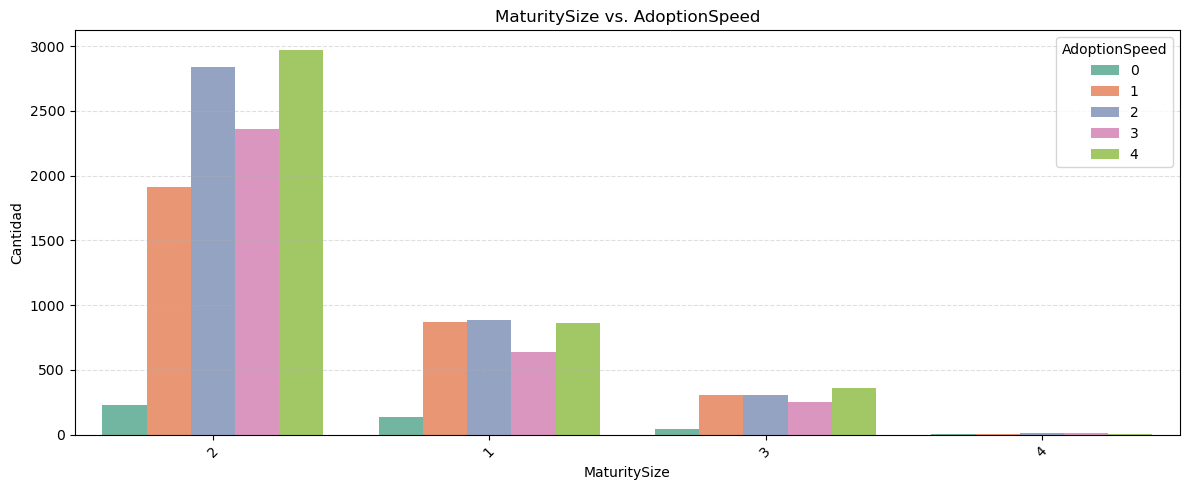

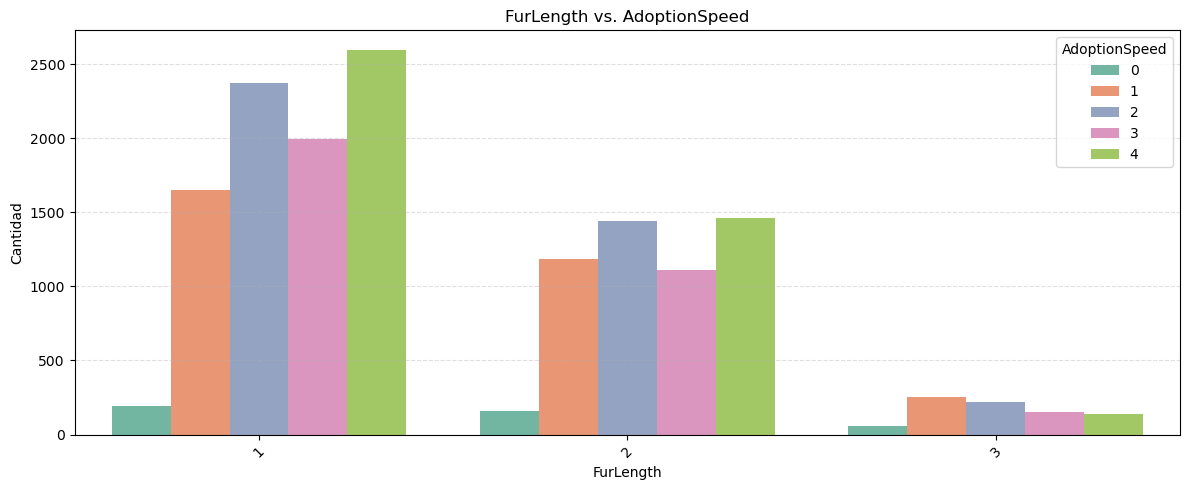

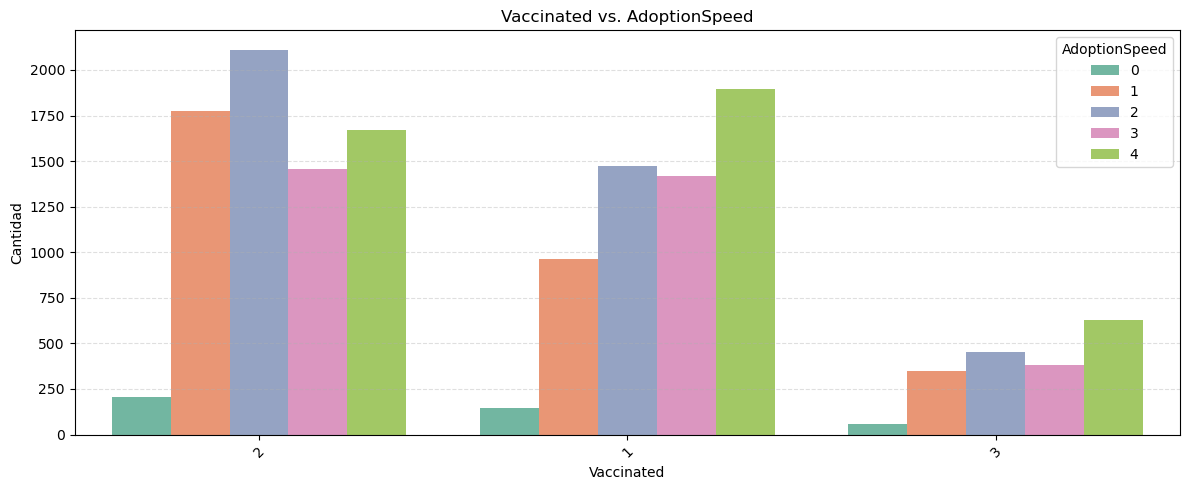

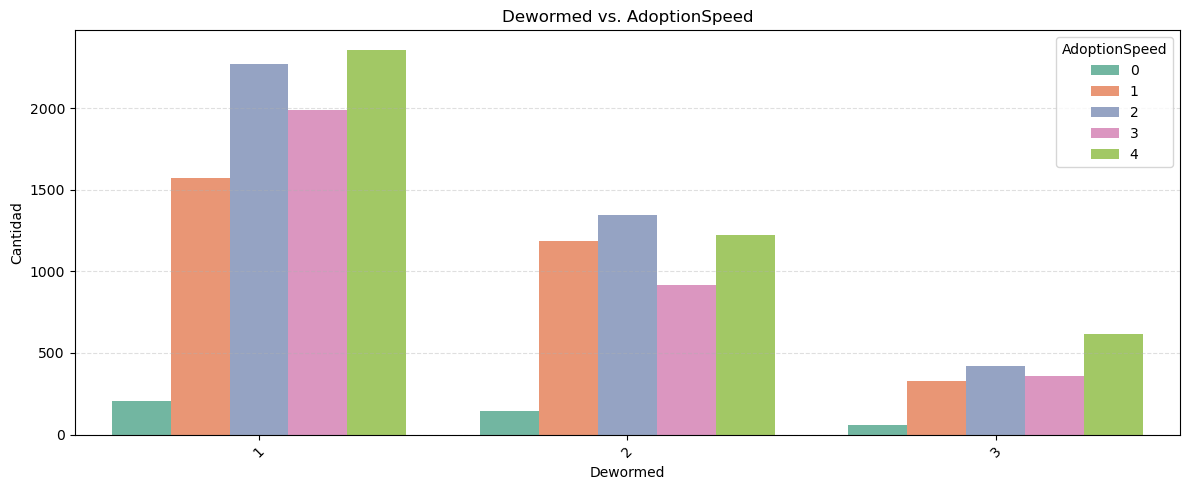

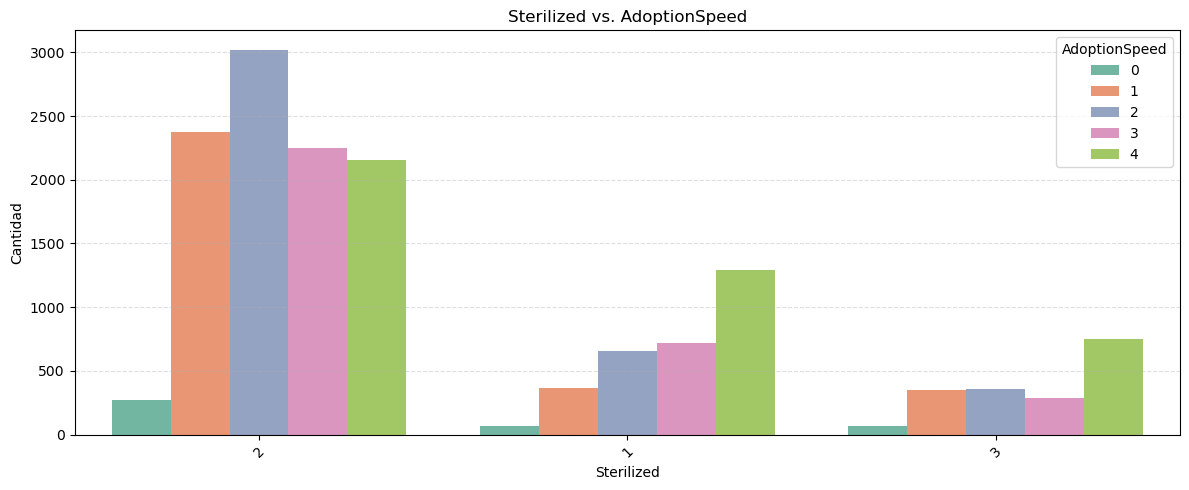

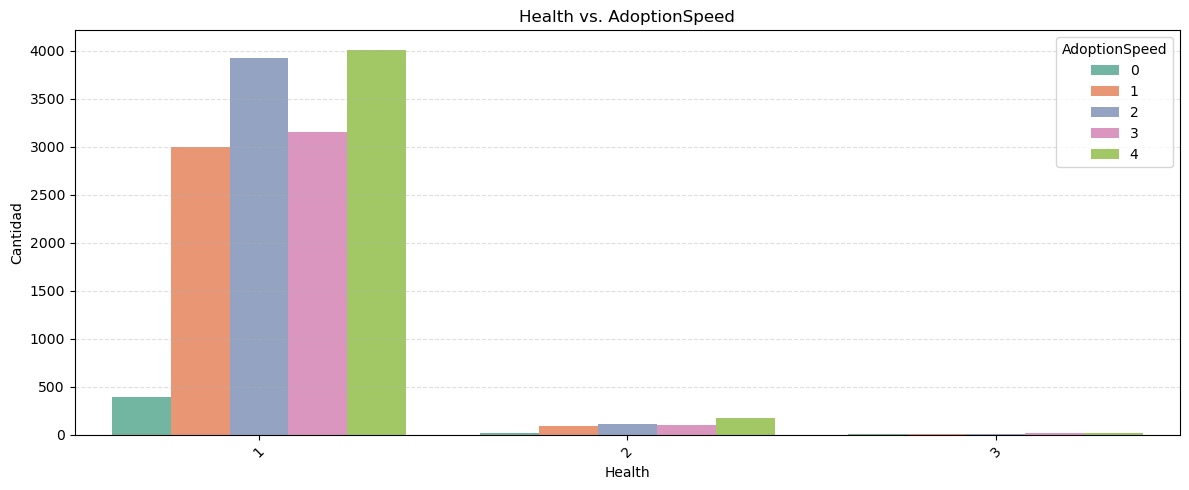

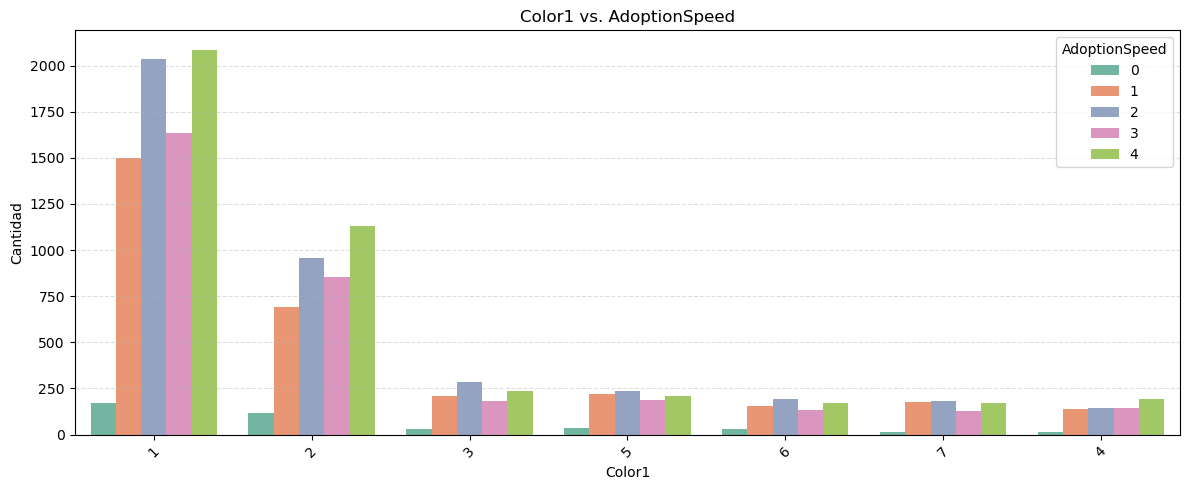

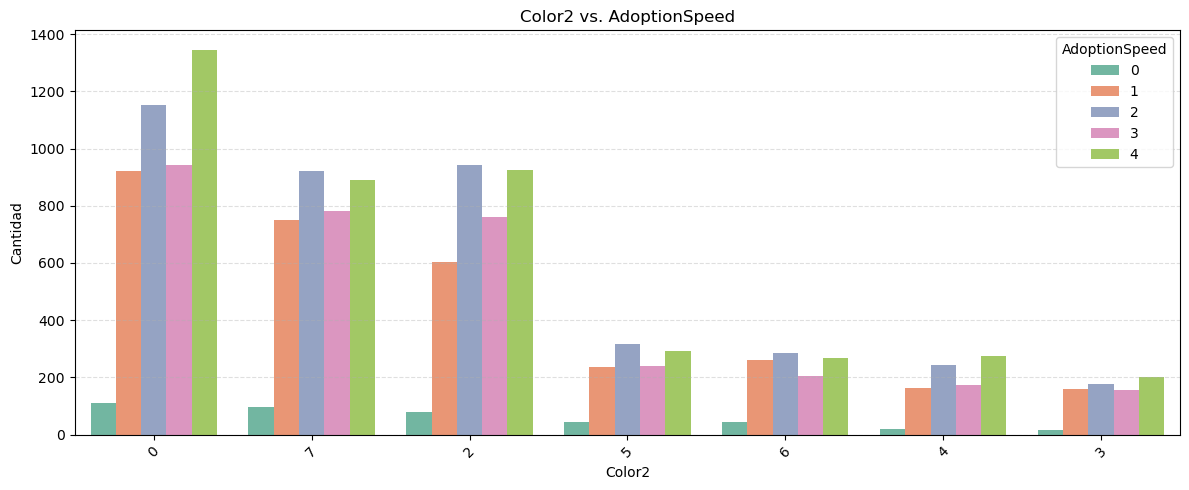

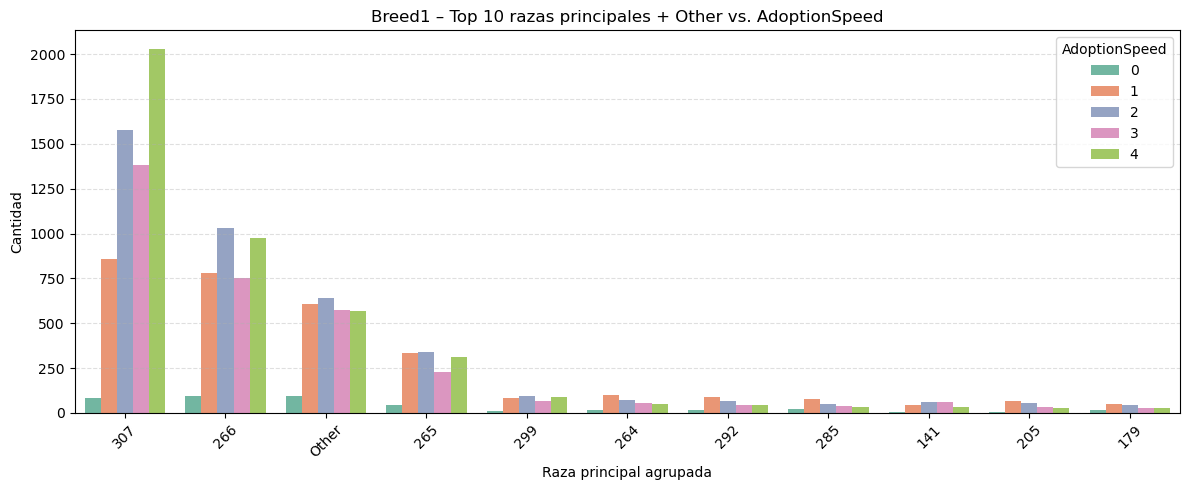

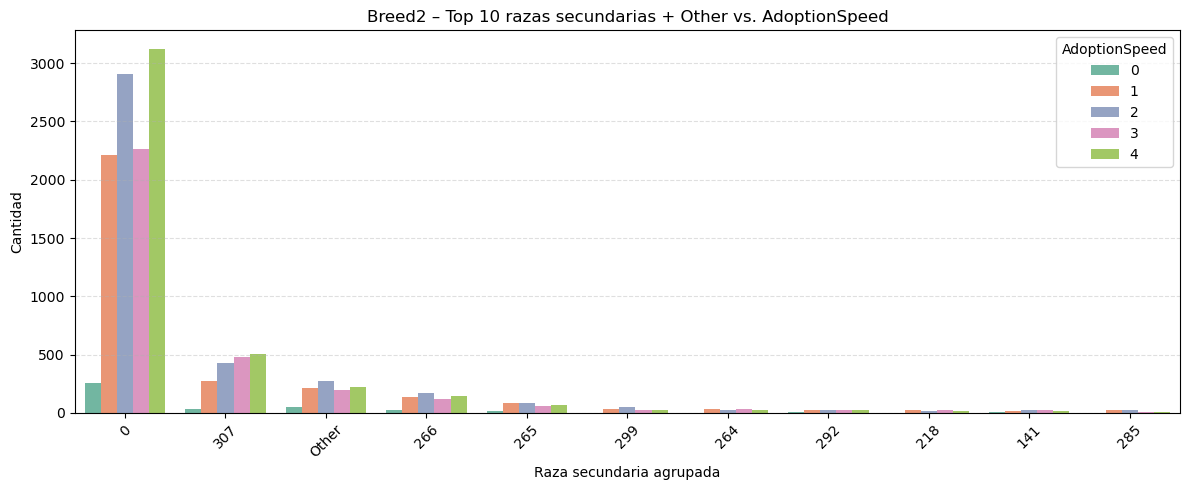

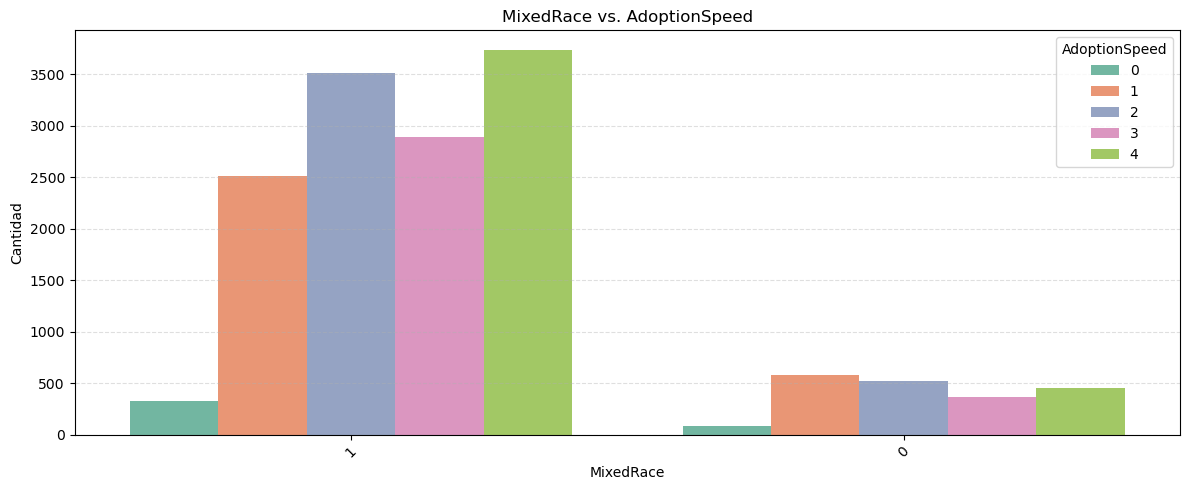

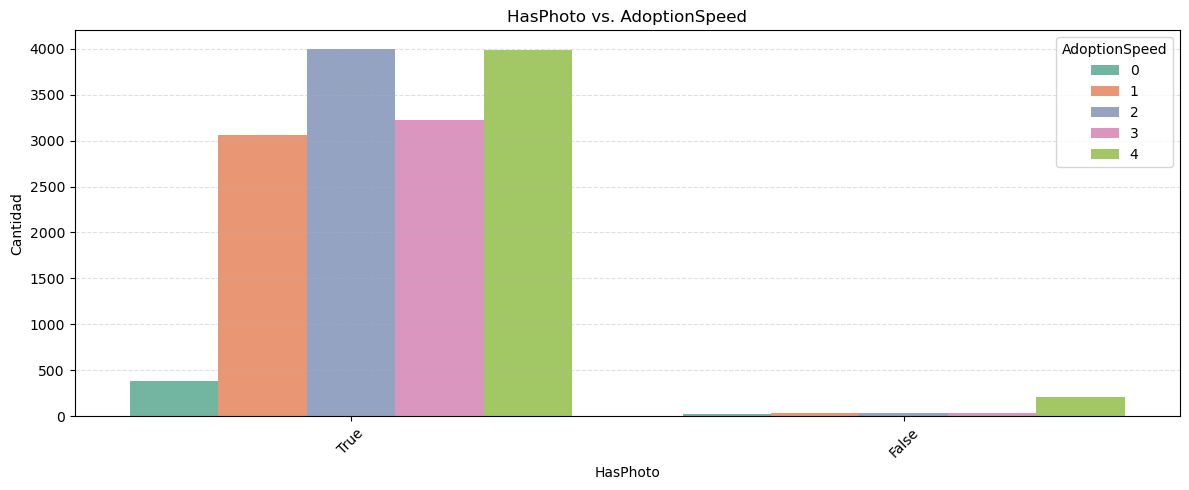

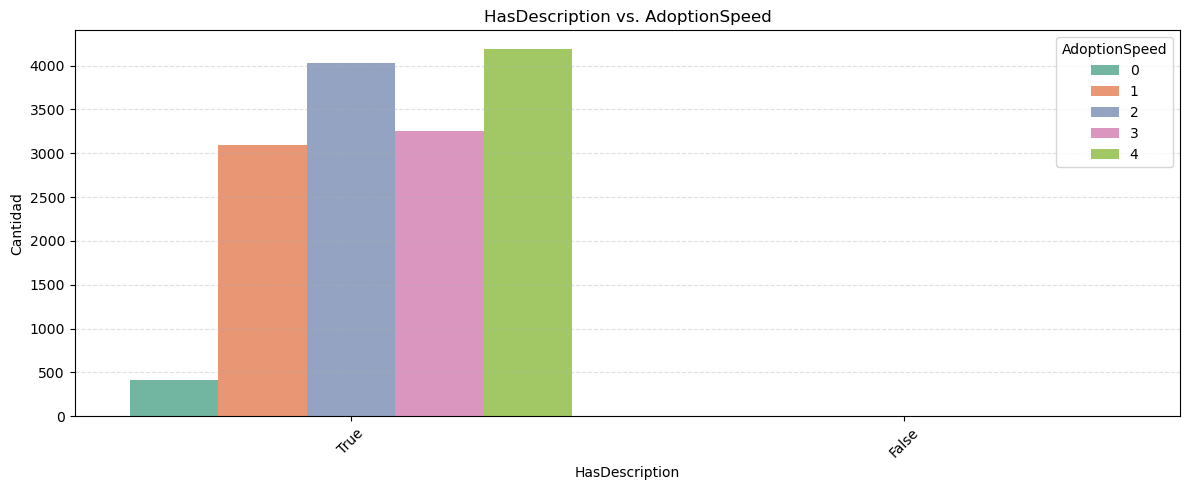

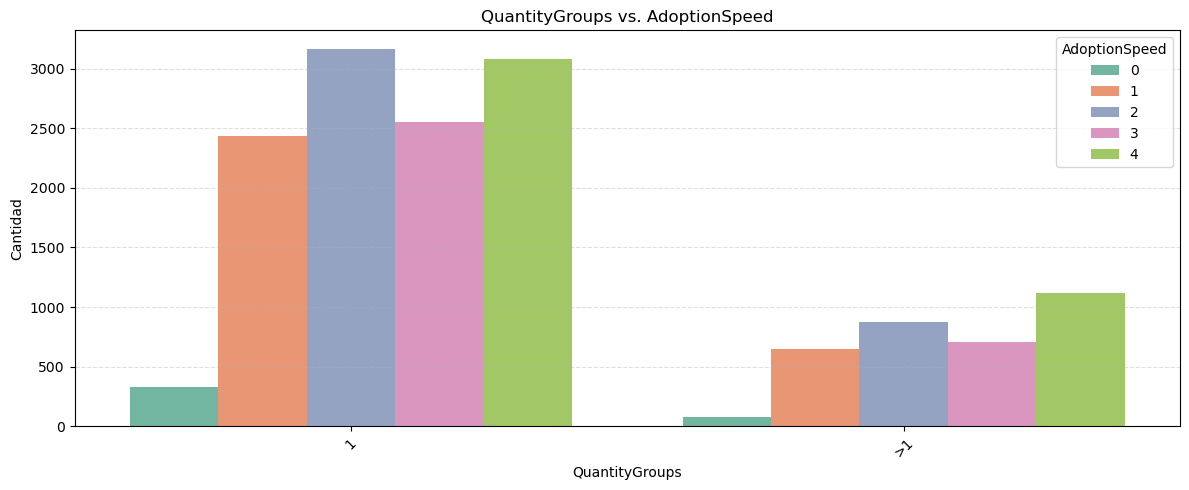

In [124]:
# Agrupar las 10 razas principales (Breed1) y secundarias (Breed2)
top_breed1 = df['Breed1'].value_counts().nlargest(10).index
top_breed2 = df['Breed2'].value_counts().nlargest(10).index

df['Breed1_Grouped'] = df['Breed1'].apply(lambda x: x if x in top_breed1 else 'Other')
df['Breed2_Grouped'] = df['Breed2'].apply(lambda x: x if x in top_breed2 else 'Other')

# Lista de variables categóricas que queremos graficar
vars_categoricas = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated',
                    'Dewormed', 'Sterilized', 'Health', 'Color1', 'Color2',
                    'Breed1_Grouped', 'Breed2_Grouped','MixedRace','HasPhoto','HasDescription','QuantityGroups']

# Gráfico por cada variable
for var in vars_categoricas:
    plt.figure(figsize=(12, 5))
    orden = df[var].value_counts().index
    sns.countplot(data=df, x=var, hue='AdoptionSpeed', order=orden, palette='Set2')

    # Títulos personalizados
    if var == 'Breed1_Grouped':
        plt.title('Breed1 – Top 10 razas principales + Other vs. AdoptionSpeed')
        plt.xlabel('Raza principal agrupada')
    elif var == 'Breed2_Grouped':
        plt.title('Breed2 – Top 10 razas secundarias + Other vs. AdoptionSpeed')
        plt.xlabel('Raza secundaria agrupada')
    else:
        plt.title(f'{var} vs. AdoptionSpeed')
        plt.xlabel(var)

    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()




En primer lugar, haciendo el análisis más burdo, observamos rápidamente que la mayoría de las variables tiene distribuciones similares.
Hay algunas, como el grupo NO esterilizado, que parecerían tener más forma "lineal". Es decir, que tienden a aumentar los tiempos de adopción en perros que NO etán esterilizado.
Otro grupo curioso es el de los que NO tiene foto. Este grupo es el que más llama la atención, porque tiene una GRAN mayoría de casos en el grupo 4 de velocidad de adopción. En simples términos, SIN FOTO, cuesta mucho que se adopte.
El resto de las variables, parecen tener una forma muy similar al de la distirbución de todo el dataset.

### 🔸 3. Importancia Relativa de Variables (Modelo Exploratorio)

Para complementar el análisis multivariado, se ajustó un **modelo exploratorio** con el objetivo de evaluar la importancia relativa de las variables predictoras en la estimación de `AdoptionSpeed`.

Se optó por un **Random Forest Classifier**, un modelo robusto que permite:

- Capturar relaciones no lineales entre variables
- Evaluar automáticamente la relevancia de cada feature
- Trabajar con variables numéricas y categóricas codificadas sin requerir normalización previa

⚠️ Cabe destacar que este modelo no busca obtener predicciones óptimas, sino servir como **herramienta de diagnóstico** para detectar qué variables tienen mayor poder explicativo.

A continuación, se presenta el proceso paso a paso.


#### 🧪 Preparación de datos para el modelo exploratorio

Se seleccionaron las variables predictoras más relevantes y se codificaron las variables categóricas mediante `LabelEncoder`, una técnica simple que asigna un número a cada categoría.

Esta codificación es suficiente para modelos de árboles como Random Forest, ya que no requieren representaciones ortogonales (como one-hot) para procesar datos categóricos.



In [132]:
# Copia del dataset original
df_model = df.copy()

# Codificación de variables categóricas con LabelEncoder
le = LabelEncoder()

for col in df_model.select_dtypes(include=['object', 'category']).columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Variables predictoras (X) y target (y)
X = df_model.drop(columns=['AdoptionSpeed', 'Name', 'Description', 'PetID', 'RescuerID','Breed1_Grouped','Breed2_Grouped'])
y = df_model['AdoptionSpeed']


#### 🌲 Entrenamiento del modelo Random Forest y obtención de importancias

Con los datos preparados, se entrenó un modelo de clasificación `RandomForestClassifier` para predecir `AdoptionSpeed`.

Este modelo permite obtener de forma directa la **importancia relativa** de cada variable, en función del aporte que hace a las decisiones de clasificación dentro del bosque de árboles.

> 📌 Recordemos que esto no busca construir un modelo definitivo, sino obtener un primer diagnóstico sobre las variables que más contribuyen a explicar la velocidad de adopción.


### 🌲 Importancia de Variables según Modelo Random Forest

Se entrenó un modelo exploratorio de **Random Forest** para estimar la **importancia relativa de las variables predictoras** sobre la velocidad de adopción (`AdoptionSpeed`).

Este tipo de análisis permite identificar qué variables tienen mayor impacto en las decisiones del modelo, considerando posibles interacciones y relaciones no lineales.  
Se utiliza en esta etapa como una herramienta práctica para:

- Priorizar atributos para etapas posteriores de modelado.
- Validar (o cuestionar) lo observado en los análisis multivariados.
- Obtener un ranking objetivo de relevancia de variables.



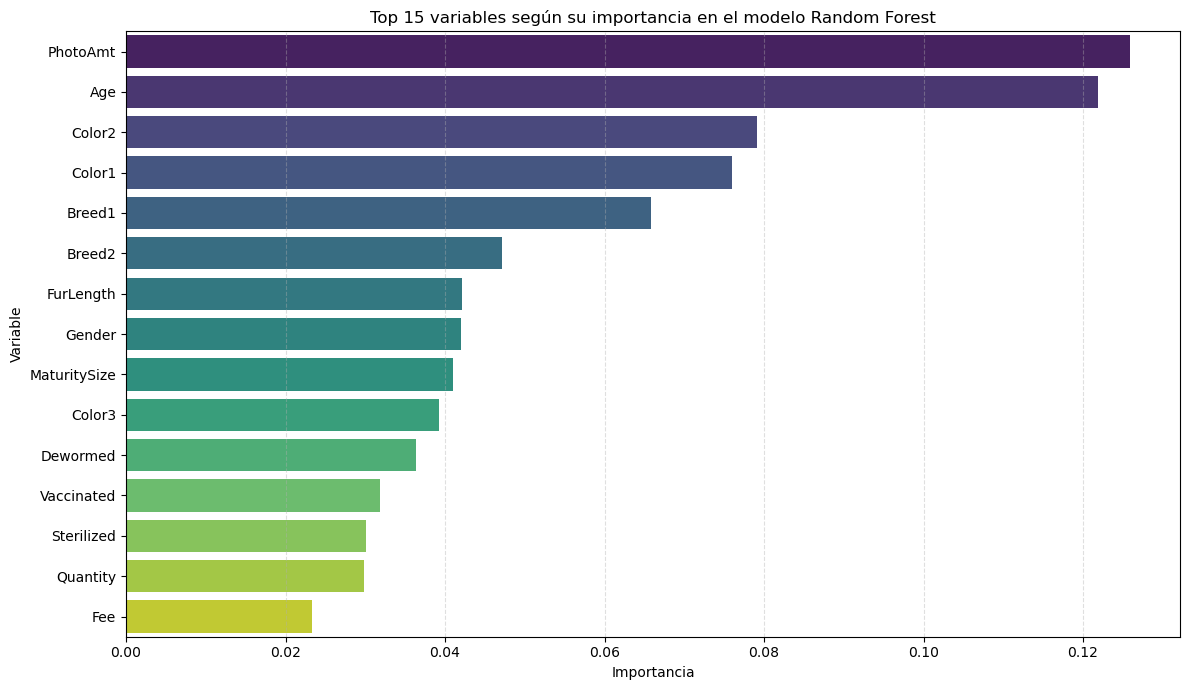

In [ ]:
# Entrenar el modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Extraer importancias
importancias = modelo.feature_importances_
features = X.columns
df_importancias = pd.DataFrame({'Variable': features, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(15), palette='viridis')
plt.title('Top 15 variables según su importancia en el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### 📌 Interpretación de resultados

El gráfico muestra las **variables más influyentes**, ordenadas de mayor a menor:

- 📸 **`PhotoAmt`** lidera el ranking, indicando que un mayor número de fotos mejora la visibilidad y favorece la adopción.
- 👶 **`Age`** (edad en meses) aparece como segunda. Condice con la hipótesis de que existe preferencia por animales más jóvenes.
- 🎨 **`Color1`, `Color2`, `Color3`** evidencian que las características visuales tienen peso.
- 🐶 **`Breed1`** y **`Breed2`** reflejan influencia de la raza en la adopción. Es interesante que no se encuentra el indicador "Mixed race" generado. Al parecer, la raza determinada sí posee más peso que si es de raza o no.
- 💉 Factores médicos como `Dewormed` y `Vaccinated` quedaron bastante abajo en el ranking. No implica irrelevancia, sino menor poder discriminante para este modelo. Algo que a priori no hubieramos hipotetizado.

> ⚠️ *Este análisis es exploratorio. La importancia puede variar con otras configuraciones o modelos, pero sirve como base sólida para la selección inicial de variables predictoras.*


Para comparar, hacemos el mismo análisis pero dejando el dataset puro. Para ver si alguna de las variables añadidas impactó demasiado al modelo.

In [139]:
# Copia del dataset original
df_model2 = df_puro.copy()

# Codificación de variables categóricas con LabelEncoder
le = LabelEncoder()

for col in df_model2.select_dtypes(include=['object', 'category']).columns:
    df_model2[col] = le.fit_transform(df_model2[col].astype(str))

# Variables predictoras (X) y target (y)
X = df_model2.drop(columns=['AdoptionSpeed', 'Name', 'Description', 'PetID', 'RescuerID'])
y = df_model2['AdoptionSpeed']

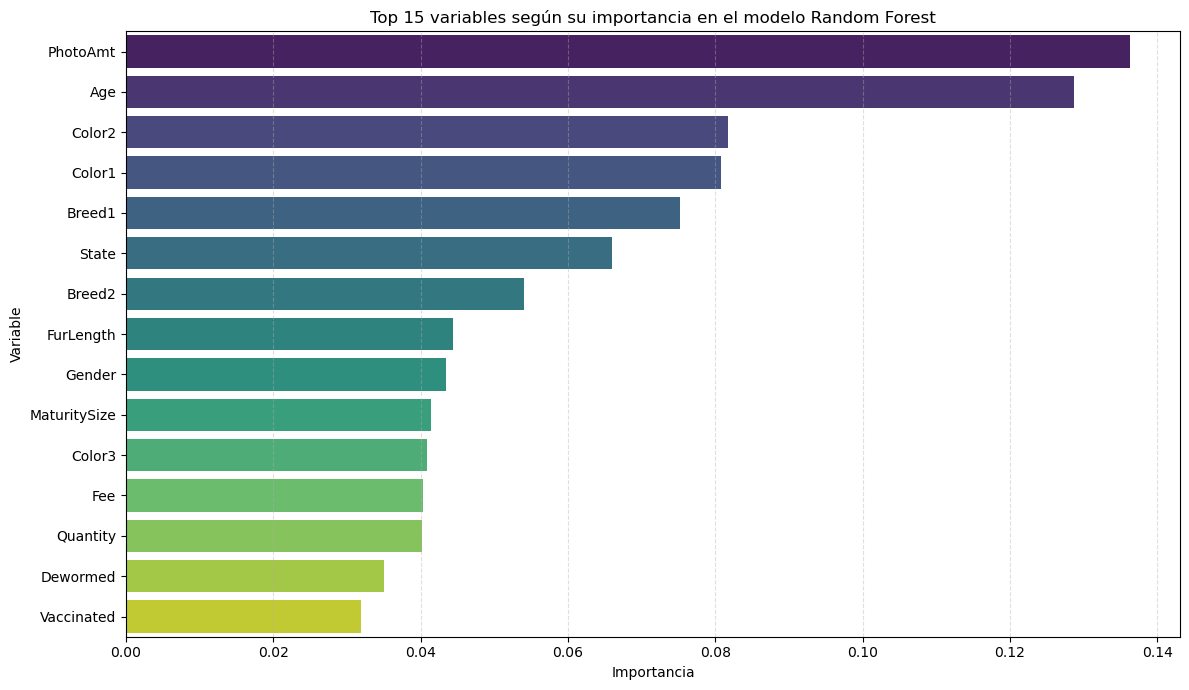

In [140]:
# Entrenar el modelo Random Forest
modelo2 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo2.fit(X, y)

# Extraer importancias
importancias = modelo2.feature_importances_
features = X.columns
df_importancias2 = pd.DataFrame({'Variable': features, 'Importancia': importancias})
df_importancias2 = df_importancias2.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Variable', data=df_importancias2.head(15), palette='viridis')
plt.title('Top 15 variables según su importancia en el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Pareciera no haber cambiado demasiado. Solamente vemos que las variables sobre las que se trabajó, restaron levemente su importancia (ejemplo: State, o Fee). Pero no de forma muy significativa. Las más relevantes, siguen estando arriba.

---

## ✅ Conclusiones del Análisis Multivariado

El análisis multivariado nos permitió comprender con mayor profundidad cómo se relacionan las variables del dataset entre sí y con la variable objetivo `AdoptionSpeed`.

A partir del recorrido realizado, se destacan tres grandes conclusiones:

1. **Estructura interna controlada:**  
   No se detectaron relaciones que sugieran multicolinealidad severa entre variables predictoras. Las correlaciones moderadas fueron documentadas y serán tenidas en cuenta para futuras etapas de modelado.

2. **Relaciones con la variable objetivo:**  
   Se identificaron asociaciones interesantes entre algunas variables y `AdoptionSpeed`. Por ejemplo:
   - Mayor cantidad de fotos (`PhotoAmt`) se asocia a adopciones más rápidas.
   - La edad parece ser un punto clave. A más viejo, más se tarda en que se adopte.

   🔍 **Nota metodológica:**  
   En esta etapa se utilizó el **coeficiente de correlación de Spearman**, que permite capturar relaciones **monótonas** (lineales o no).  
   Sin embargo, podrían existir relaciones más complejas **no monótonas** (ej. en forma de U o curvilíneas) que escapen tanto a Pearson como a Spearman.  
   Estas se evaluarán posteriormente mediante técnicas basadas en árboles o modelos no lineales más expresivos.

3. **Importancia de variables según modelo exploratorio:**  
   El modelo Random Forest permitió jerarquizar las variables por su aporte predictivo. Estas señales serán clave para una **futura selección de features más robusta**, acompañada posiblemente por métodos como:
   - Análisis de VIF (Factor de Inflación de Varianza)
   - Reducción de dimensionalidad (PCA)
   - Modelos ajustados con validación cruzada y optimización de hiperparámetros

---


# 🛠️ Feature Engineering: Construcción y Evaluación de Nuevas Variables

Una vez finalizado el análisis exploratorio univariado y multivariado, se procedió a la construcción de variables derivadas con el objetivo de:

- Mejorar la interpretabilidad.
- Codificar relaciones implícitas en el dominio.
- Preparar el dataset para su uso posterior en modelos predictivos.

Estas transformaciones fueron guiadas por los hallazgos estadísticos previos.  
En particular, algunas variables derivadas se construyeron **después** del análisis multivariado para **no introducir correlaciones artificiales** que pudieran distorsionar la matriz de correlación o el comportamiento del dataset. Se hizo el análisis previo a, y luego de sumarlas, y no fue afectado de forma significativa.

> 📌 Por ejemplo, la variable `AgeYear` (edad expresada en años) fue creada por conveniencia interpretativa, pero **no fue incorporada al análisis multivariado** debido a su colinealidad perfecta con `Age`.

Ya fueron creadas las variables HasDescription, HasName, MixedRace, QuantityGroups, que sumarizan algunas variables con muchos datos. Ahora sumaremos algunas otras que fueron de interés.

### 🔹 Variable `AgeYear` (Edad en años)

Se creó la variable `AgeYear` dividiendo la edad original (`Age`, expresada en meses) por 12, con el objetivo de facilitar su interpretación.

```python
df["AgeYear"] = df["Age"] / 12


In [141]:
# 🐾 Edad en años (AgeYear)
df["AgeYear"] = df["Age"] / 12


### 🔹 Variable `HealthScore` (Nivel de atención veterinaria)

Dado que las variables `Vaccinated`, `Dewormed` y `Sterilized` mostraron alta correlación entre sí (r ≈ 0.7), se construyó una variable sintética llamada `HealthScore`.

Esta nueva variable representa el **nivel de atención veterinaria** recibido por la mascota, calculado como la **suma de los tres indicadores sanitarios**, que asumen valores:

- `1`: sí
- `2`: no
- `3`: no se sabe

Para consolidar esta información de manera consistente, primero se transformaron los valores para que `1` signifique atención positiva (`Sí`) y los demás sean 0:

df["Vaccinated_Bin"] = (df["Vaccinated"] == 1).astype(int)
df["Dewormed_Bin"] = (df["Dewormed"] == 1).astype(int)
df["Sterilized_Bin"] = (df["Sterilized"] == 1).astype(int)
df["HealthScore"] = df[["Vaccinated_Bin", "Dewormed_Bin", "Sterilized_Bin"]].sum(axis=1)


In [143]:
df["Vaccinated_Bin"] = (df["Vaccinated"] == 1).astype(int)
df["Dewormed_Bin"] = (df["Dewormed"] == 1).astype(int)
df["Sterilized_Bin"] = (df["Sterilized"] == 1).astype(int)
df["HealthScore"] = df[["Vaccinated_Bin", "Dewormed_Bin", "Sterilized_Bin"]].sum(axis=1)
# Esta variable resume el nivel de atención sanitaria recibido por la mascota,
# y permite capturar su efecto combinado sin introducir multicolinealidad,
# ya que las variables originales presentaban correlaciones altas entre sí.


> Esta transformación busca representar de forma más sintética y robusta el impacto del cuidado veterinario, reduciendo la redundancia estadística sin perder información relevante para el modelado.


Buscamos luego incorporar datos referidos a las razas de los animales. Pero con una mayoría de animales de raza mixta, esa categorización no tendría mucho sentido, siendo muy complejo generalizar sin introducir error.

### 🔹 Variable `Sentiment` (Analisis de sentimiento sobre descripción)

Ahora vamos a generar un análisis de sentimiento sencillo sobre la descripción. Intentando encontrar si hay diferencias en las descripciones, o son todas similares, y cómo se relacionan estas a la velocidad de adopción.

In [146]:
#!pip install textblob

In [148]:
#Generar analisis de sentimiento sobre la descripción que categorice en positivo, negativo o neutro
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk import download
download('punkt')
download('averaged_perceptron_tagger')
download('brown')
download('movie_reviews')
download('wordnet')
download('stopwords')
download('omw-1.4')
download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Crear una instancia del analizador de sentimientos
sia = SentimentIntensityAnalyzer()
# Función para clasificar el sentimiento
def clasificar_sentimiento(texto):
    puntaje = sia.polarity_scores(texto)["compound"]
    if puntaje >= 0.05:
        return "Positivo"
    elif puntaje <= -0.05:
        return "Negativo"
    else:
        return "Neutro"
# Reemplazar valores NaN en la columna de descripción con una cadena vacía
df["Description"] = df["Description"].fillna("")

# Aplicar la función a la columna de descripción
df["Sentiment"] = df["Description"].apply(clasificar_sentimiento)
# Verificar los resultados
df["Sentiment"].value_counts(dropna=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Sentiment
Positivo    13073
Neutro       1312
Negativo      608
Name: count, dtype: int64

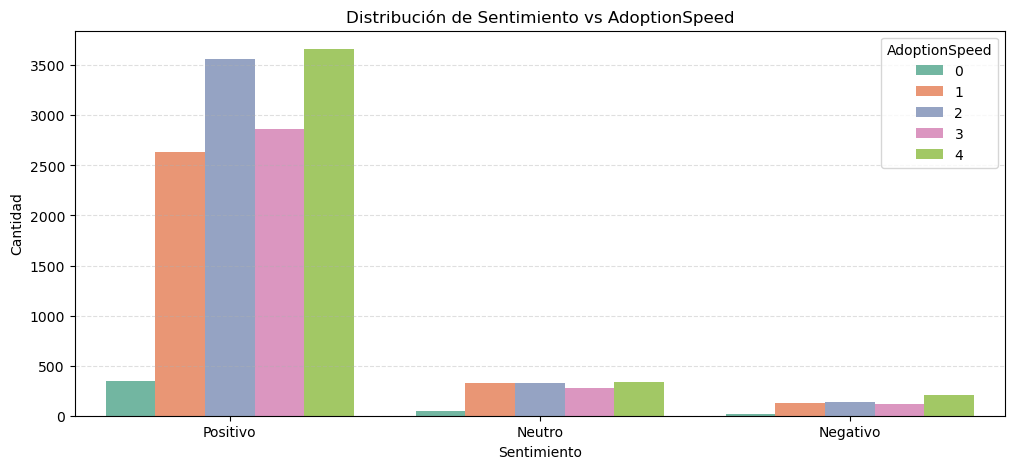

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Sentiment", hue="AdoptionSpeed", palette="Set2")
plt.title("Distribución de Sentimiento vs AdoptionSpeed")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.legend(title="AdoptionSpeed")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Pareciera no haber diferencias demasiado grandes entre los grupos. Quizás el negativo tiene una proporción mayor (a la vista) de los grupo 4. Pero no pareciera ser muy significativo.

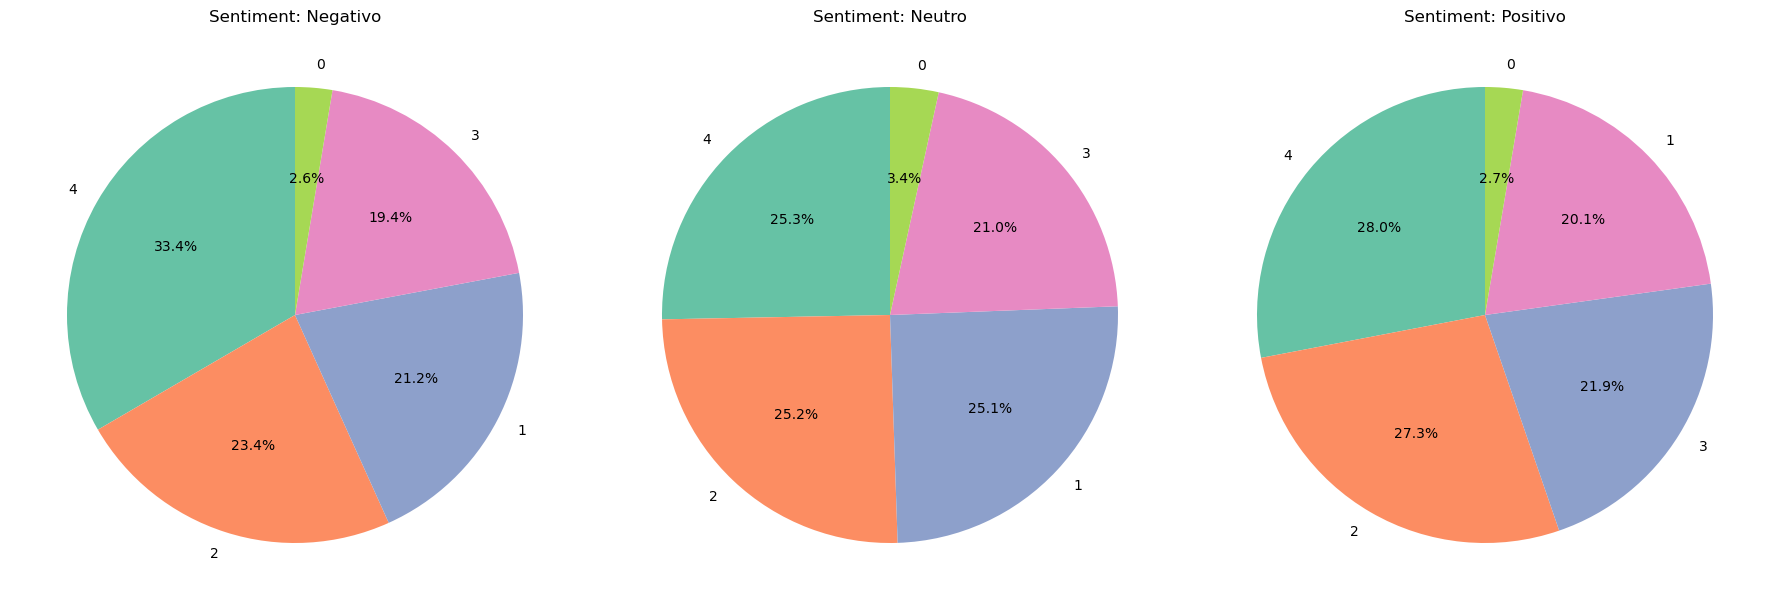

In [153]:
sentiment_categories = df["Sentiment"].unique()

plt.figure(figsize=(18, 6))

for i, sentiment in enumerate(sorted(sentiment_categories)):
    plt.subplot(1, 3, i + 1)
    adoption_speed_counts = df[df["Sentiment"] == sentiment]["AdoptionSpeed"].value_counts()
    plt.pie(
        adoption_speed_counts.values,
        labels=adoption_speed_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2", len(adoption_speed_counts))
    )
    plt.title(f"Sentiment: {sentiment}")

plt.tight_layout()
plt.show()


En proporción, los negativos parecieran tener un % mayor de valores en grupo 4. Pero no pareciera ser demasiado diferente al positivo.

In [154]:
print("Negativos:")
print(df[df["Sentiment"] == "Negativo"]["Description"].head(10))

print("\nPositivos:")
print(df[df["Sentiment"] == "Positivo"]["Description"].head(10))

print("\nNeutros:")
print(df[df["Sentiment"] == "Neutro"]["Description"].head(10))


Negativos:
14     Lost Dog Found (Bandar Menjalara, Kepong／Taman...
62     Milky was dump ard our area for more than half...
79     This puppy is currently living in an abandoned...
94                           location: Klang contact no.
123    Litter #2 has 4 kittens. These kittens were fo...
155    A pure breed doberman need a permanent home. I...
157    rm80 is charged for 2 month vaccination fees. ...
162    She used to follow a pack of adult dogs near m...
166    These five puppies are in danger. Please help ...
228    Found the poor thing while I was out for break...
Name: Description, dtype: object

Positivos:
0     Nibble is a 3+ month old ball of cuteness. He ...
1     I just found it alone yesterday near my apartm...
2     Their pregnant mother was dumped by her irresp...
3     Good guard dog, very alert, active, obedience ...
4     This handsome yet cute boy is up for adoption....
6     anyone within the area of ipoh or taiping who ...
7     Siu Pak just give birth on 13/6/

Lo que podemos ver a priori, es que los "negativos" no son "malas descripciones". Sino que quizás cuentan que estaban en malas condiciones o en peligro. Lo cual explica en parte por qué no tienen tanto impacto en la adopción como pensabamos.

Haremos ahora un wordcloud con la intención de observar si hay palabras clave diferentes en cada grupo de adopción. Y luego ver si podemos identificar cada descripción para ver cuántas contiene de cada una, para sumarlo al análisis y ver si encontramos algo.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


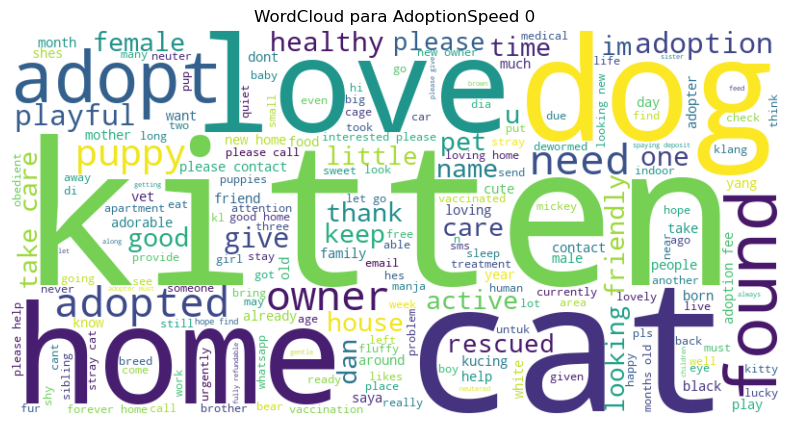

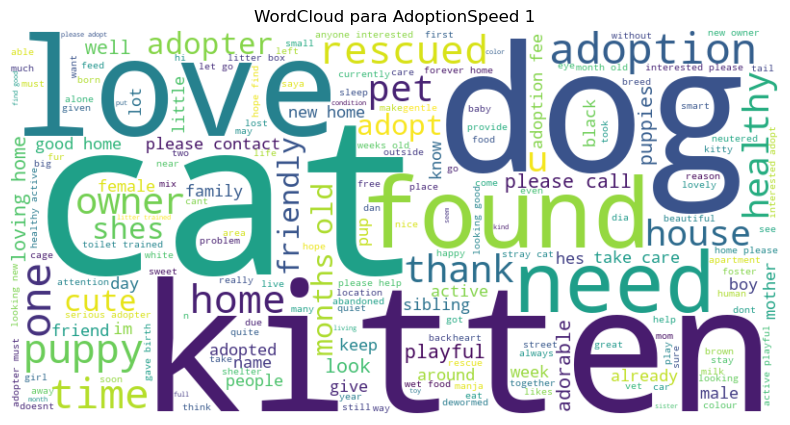

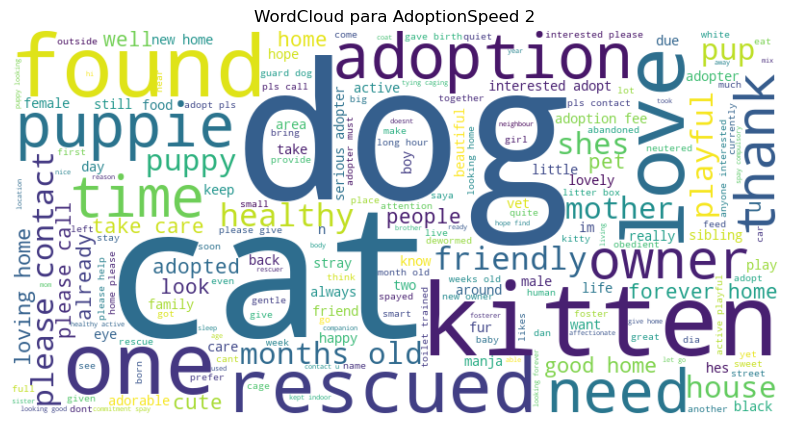

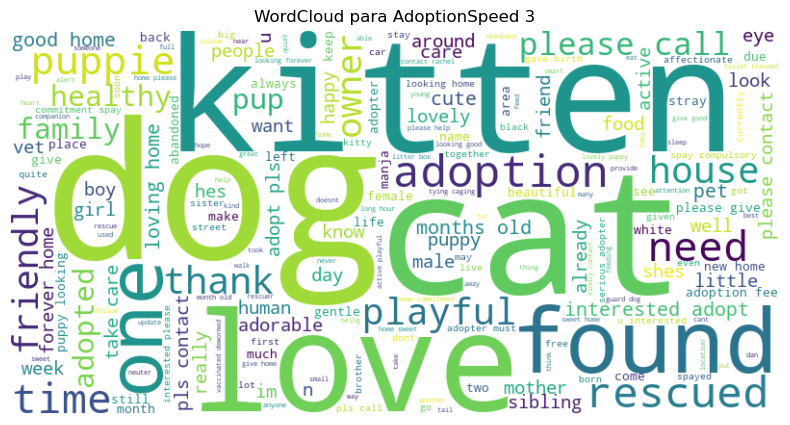

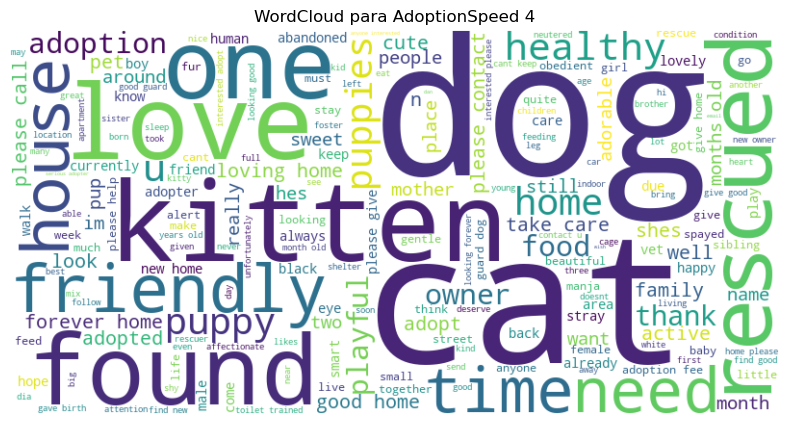

Top 20 palabras para AdoptionSpeed 0:
home: 172
please: 135
cat: 126
kitten: 98
adoption: 91
care: 86
adopt: 85
love: 81
2: 76
looking: 75
new: 75
dog: 73
good: 73
found: 71
kittens: 70
adopted: 66
take: 65
owner: 65
playful: 64
interested: 62


Top 20 palabras para AdoptionSpeed 1:
home: 1460
please: 1169
cat: 889
adoption: 843
kitten: 725
dog: 724
adopt: 684
found: 669
2: 664
good: 640
old: 636
playful: 606
interested: 576
looking: 552
call: 549
give: 536
healthy: 511
puppy: 500
love: 493
active: 489


Top 20 palabras para AdoptionSpeed 2:
home: 2048
please: 1606
dog: 1107
adoption: 1106
cat: 966
good: 915
adopt: 881
interested: 823
old: 811
2: 809
contact: 807
playful: 780
give: 776
found: 734
looking: 731
kitten: 727
love: 706
call: 704
puppy: 685
loving: 677


Top 20 palabras para AdoptionSpeed 3:
home: 1855
please: 1318
adoption: 1008
dog: 1007
good: 835
cat: 807
adopt: 758
interested: 740
give: 709
2: 694
contact: 692
found: 675
looking: 660
call: 649
old: 644
love: 641
loving: 

In [155]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import string

# Descargar stopwords si no están disponibles
download('stopwords')

# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = texto.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    palabras = texto.split()  # Dividir en palabras
    palabras = [palabra for palabra in palabras if palabra not in stop_words]  # Eliminar stopwords
    return palabras

# Crear wordcloud y obtener top 20 palabras por categoría de AdoptionSpeed
resultados = {}
for speed in sorted(df['AdoptionSpeed'].unique()):
    # Filtrar descripciones por categoría
    descripciones = df[df['AdoptionSpeed'] == speed]['Description'].dropna()
    
    # Limpiar y juntar todas las palabras
    palabras = []
    for descripcion in descripciones:
        palabras.extend(limpiar_texto(descripcion))
    
    # Generar wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras))
    
    # Mostrar wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud para AdoptionSpeed {speed}')
    plt.show()
    
    # Obtener top 20 palabras más repetidas
    contador = Counter(palabras)
    top_20 = contador.most_common(20)
    resultados[speed] = top_20

# Mostrar top 20 palabras por categoría
for speed, top_20 in resultados.items():
    print(f"Top 20 palabras para AdoptionSpeed {speed}:")
    for palabra, frecuencia in top_20:
        print(f"{palabra}: {frecuencia}")
    print("\n")

Esto que encontramos nos demuestra lo que temíamos. Las descripciones son MUY similares. Lo cuál hace que el análisis de este punto, no aporte resultados significativos.

### 🔹 Variable `Rescuer category` (Analisis de cuántas publicaciones tuvo el rescatista)

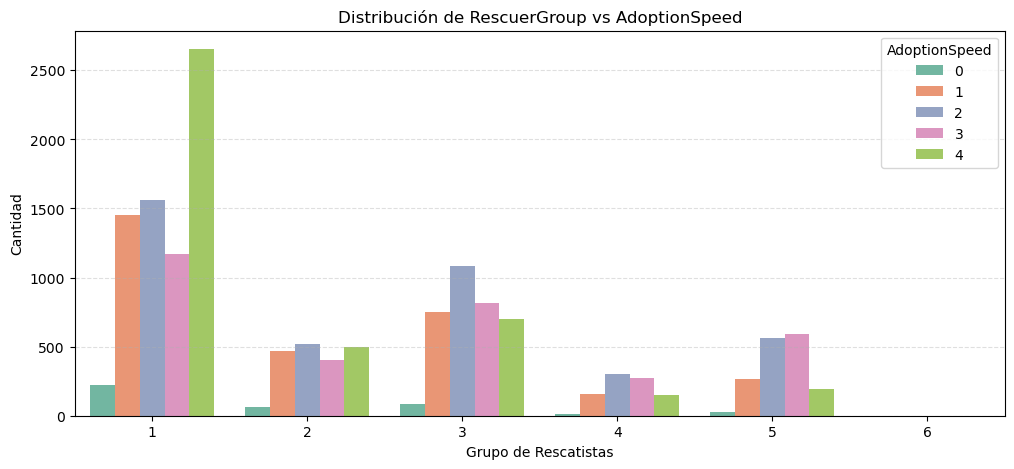

In [167]:

rescuer_counts = df['RescuerID'].value_counts()
rescuer_counts = rescuer_counts.reset_index()
rescuer_counts.columns = ['RescuerID', 'Count']
# Clasificar en 5 grupos
bins = [0, 5, 10, 50, 100, 1000, float('inf')]
labels = [1, 2, 3, 4, 5, 6]
rescuer_counts['RescuerGroup'] = pd.cut(rescuer_counts['Count'], bins=bins, labels=labels, right=False)
# Unir con el dataframe original
df = df.merge(rescuer_counts[['RescuerID', 'RescuerGroup']], on='RescuerID', how='left')
# Reemplazar NaN por 5 (muy pocas adopciones)
df['RescuerGroup'] = df['RescuerGroup'].fillna(5)
# Verificar la nueva variable
df['RescuerGroup'].value_counts()
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='RescuerGroup', hue='AdoptionSpeed', palette='Set2')
plt.title('Distribución de RescuerGroup vs AdoptionSpeed')
plt.xlabel('Grupo de Rescatistas')
plt.ylabel('Cantidad')
plt.legend(title='AdoptionSpeed')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Acá vemos algo interesante. El adoption speed 4 (es decir, los que más tardan) se relacionan a rescatistas con pocas adopciones.
Esto se explica desde que la gente tiene desconfianza cuando ve publicaciones de gente sin historial previo.
Si lo vemos por proporciones, queda más claro:


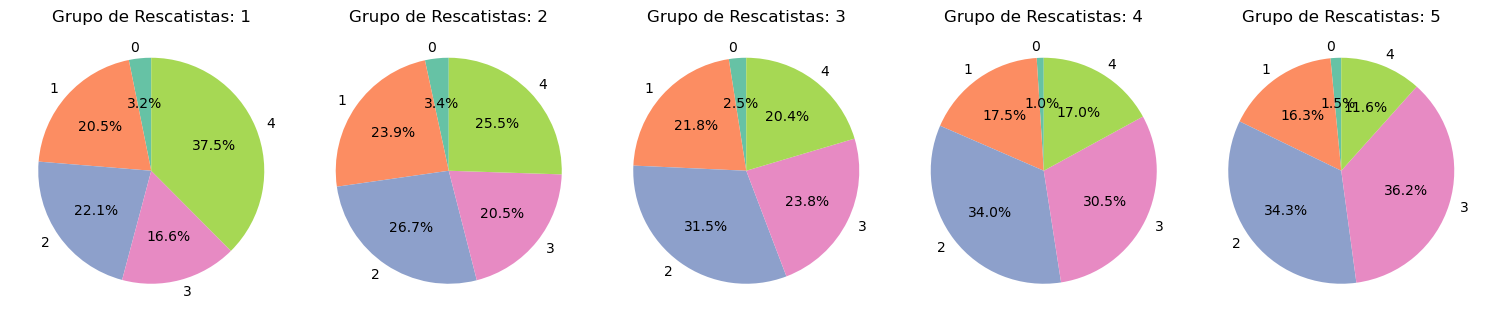

In [169]:
# Definir una paleta de colores fija para las categorías de AdoptionSpeed
adoption_speed_colors = sns.color_palette('Set2', len(df['AdoptionSpeed'].unique()))

# Mostrar pie charts por grupo de rescatistas abiertos en adoption speed
plt.figure(figsize=(18, 6))
for i, rescuer_group in enumerate(sorted(df['RescuerGroup'].unique())):
    plt.subplot(1, 6, i + 1)
    adoption_speed_counts = df[df['RescuerGroup'] == rescuer_group]['AdoptionSpeed'].value_counts().sort_index()
    plt.pie(
        adoption_speed_counts.values,
        labels=adoption_speed_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[adoption_speed_colors[speed] for speed in adoption_speed_counts.index]
    )
    plt.title(f'Grupo de Rescatistas: {rescuer_group}')
plt.tight_layout()


Los grupo 2 y 3 parecen aumentar en cada grupo sucesivo, disminuyendo en su lugar los grupos 0,1 y 4. Basicamente los extremos se achican a medida que se tienen más casos. Por un lado, matemáticamente tiene sentido (hay más muestras en cada rescatista de esos grupos, que en el grupo 1 donde la muestra es más pequeña). Por el otro, que el grupo 4 disminuya podría indicar también mayor confianza hacia los rescatistas con un historial más probado.

In [173]:
df['RescuerGroup'].describe()

count     14993
unique        5
top           1
freq       7069
Name: RescuerGroup, dtype: int64

# Modelos

## RandomForest

In [181]:
# Copia del dataset original
df_modelRF = df.copy()

# Codificación de variables categóricas con LabelEncoder
le = LabelEncoder()

for col in df_modelRF.select_dtypes(include=['object', 'category']).columns:
	df_modelRF[col] = le.fit_transform(df_modelRF[col].astype(str))

# Variables predictoras (X) y target (y)
X = df_modelRF.drop(columns=['AdoptionSpeed', 'Name', 'Description', 'PetID', 'RescuerID', 'Breed1_Grouped', 'Breed2_Grouped'])
y = df_modelRF['AdoptionSpeed']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, shuffle=True, test_size=0.2)

# Entrenar el modelo Random Forest
rf.fit(X_train, y_train)

# Evaluar el modelo
accuracy = rf.score(X_test, y_test)
print(f"Accuracy del modelo Random Forest: {accuracy:.2f}")


Accuracy del modelo Random Forest: 0.42


In [182]:
y_pred = rf.predict(X_test)

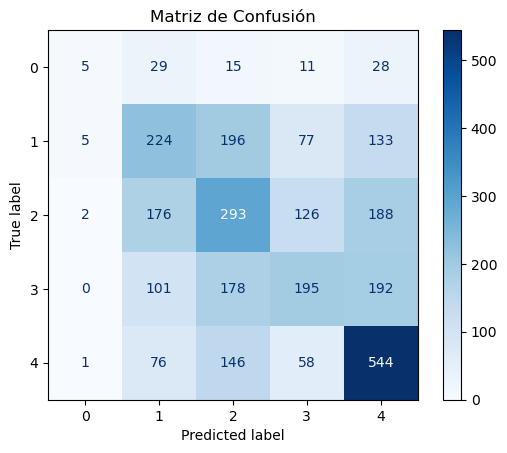

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
# Crear un gráfico de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred, target_names=list(map(str, rf.classes_))))

              precision    recall  f1-score   support

           0       0.38      0.06      0.10        88
           1       0.37      0.35      0.36       635
           2       0.35      0.37      0.36       785
           3       0.42      0.29      0.34       666
           4       0.50      0.66      0.57       825

    accuracy                           0.42      2999
   macro avg       0.41      0.35      0.35      2999
weighted avg       0.41      0.42      0.41      2999



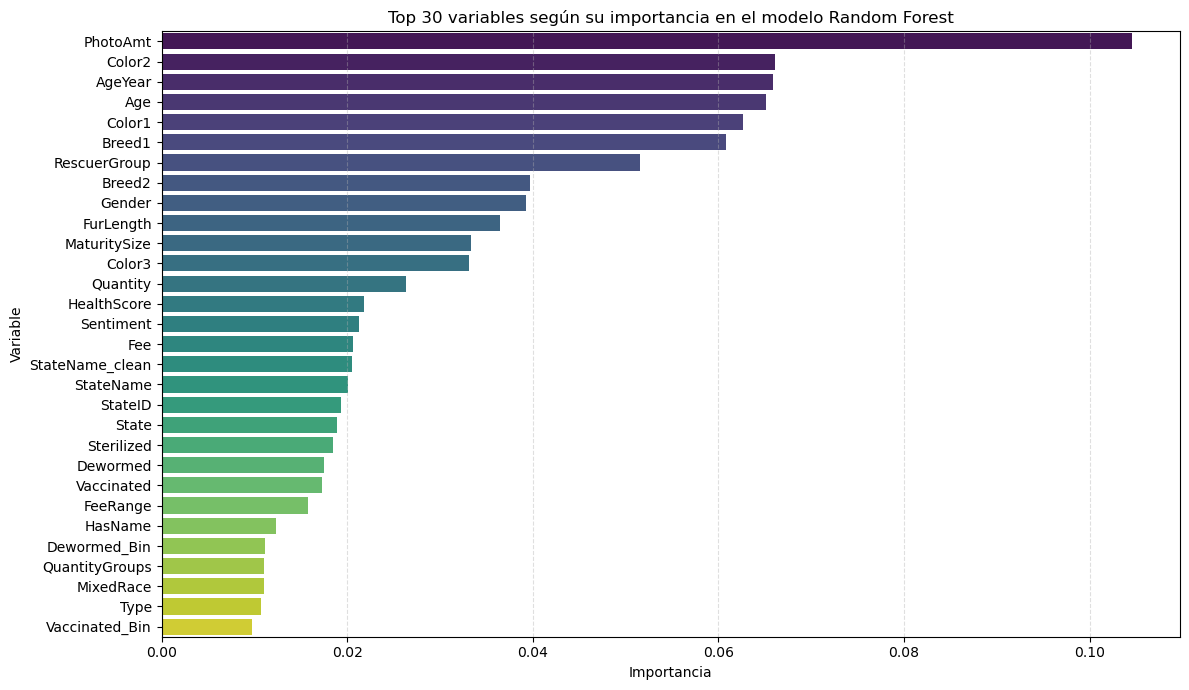

In [188]:
importances = rf.feature_importances_
features = X.columns
df_importancias = pd.DataFrame({'Variable': features, 'Importancia': importances})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)
# Graficar
plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(30), palette='viridis')
plt.title('Top 30 variables según su importancia en el modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


De las variables añadidas, la de mejor resultado fue Rescuer Groups. AgeYear también, pero comparte con Age. Se solapan por estar directamente correlacionadas.

El 42% de Accuracy es bastante bueno para un modelo sencillo. Evaluaremos otro tipo de modelos para seguir viendo si podemos mejorarlo.

                 Model  Accuracy ROC AUC
0  Logistic Regression  0.314105    None
1        Random Forest  0.419140    None
2    Gradient Boosting  0.400800    None
3                  SVC  0.261087    None
4        Decision Tree  0.347116    None


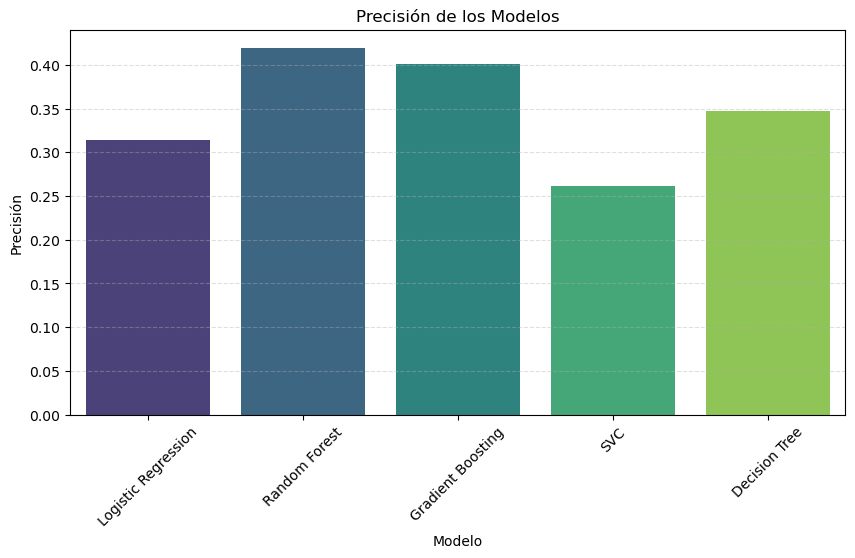

ValueError: multiclass format is not supported

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Importar librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Título: Definición de modelos
# Definir los modelos a comparar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=12),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=12),
    "SVC": SVC(probability=True, random_state=12),
    "Decision Tree": DecisionTreeClassifier(random_state=12)
}

# Título: Preparación de datos
# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=["Model", "Accuracy"])
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, shuffle=True, test_size=0.2)

# Título: Entrenamiento y evaluación de modelos individuales
# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Hacer predicciones
    accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión
    results = pd.concat([results, pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy]})], ignore_index=True)

# Título: Resultados de modelos individuales
# Mostrar los resultados
print(results)

# Título: Gráfico de precisión de modelos individuales
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Precisión de los Modelos")
plt.ylabel("Precisión")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Título: Clasificador de votación
# Definir el modelo de VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=12)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=12)),
    ('svc', SVC(probability=True, random_state=12)),
    ('dt', DecisionTreeClassifier(random_state=12))
], voting='soft')
voting_model.fit(X_train, y_train)  # Entrenar el modelo
y_pred_voting = voting_model.predict(X_test)  # Hacer predicciones
accuracy_voting = accuracy_score(y_test, y_pred_voting)  # Calcular precisión
results = results.append({"Model": "Voting Classifier", "Accuracy": accuracy_voting}, ignore_index=True)

# Título: Resultados del clasificador de votación
# Mostrar los resultados
print(results)

# Título: Gráfico de precisión incluyendo el clasificador de votación
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Precisión de los Modelos")
plt.ylabel("Precisión")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Título: Optimización de hiperparámetros para Random Forest
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf_model = RandomForestClassifier(random_state=12)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Ajustar el modelo
print("Mejores parámetros:", grid_search.best_params_)  # Mostrar los mejores parámetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)  # Hacer predicciones
accuracy_best = accuracy_score(y_test, y_pred_best)  # Calcular precisión
results = results.append({"Model": "Best Random Forest", "Accuracy": accuracy_best}, ignore_index=True)

# Título: Resultados finales incluyendo el mejor modelo Random Forest
# Mostrar los resultados
print(results)

# Título: Gráfico final de precisión de todos los modelos
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Precisión de los Modelos")
plt.ylabel("Precisión")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()




FALTA ARREGLAR PERO EL RANDOM FOREST PARECE SER EL MEJORCITO

# Backlog

* Agregar comentarios en cada celda
* Análisis Multivariado